<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_350-400.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [960]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [961]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


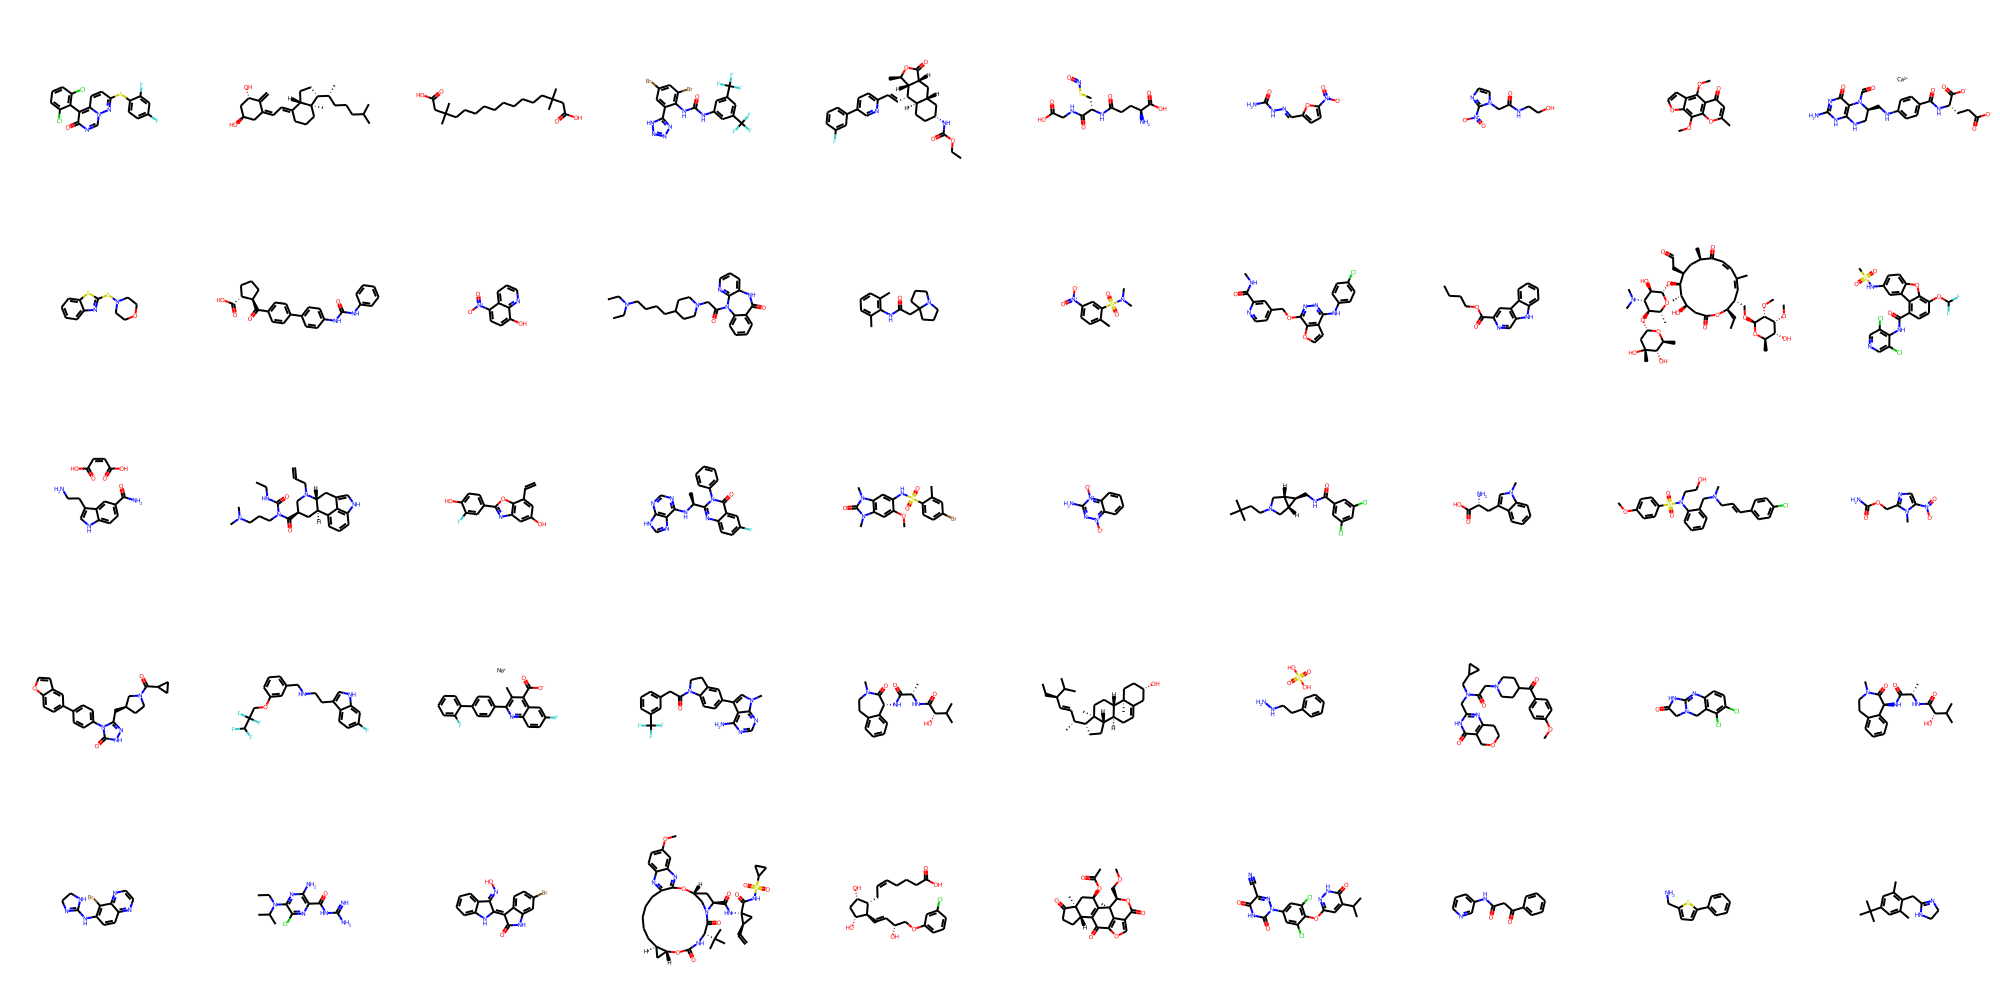

In [962]:
smiles_list = ['O=c1ncn2nc(Sc3ccc(F)cc3F)ccc2c1-c1c(Cl)cccc1Cl',
'C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H](C)CCCC(C)C)C[C@@H](O)C[C@@H]1O',
'CC(C)(CCCCCCCCCCC(C)(C)CC(=O)O)CC(=O)O',
'O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc1c(Br)cc(Br)cc1-c1nnn[nH]1',
'CCOC(=O)N[C@@H]1CC[C@@H]2[C@@H](C1)C[C@H]1C(=O)O[C@H](C)[C@H]1[C@H]2/C=C/c1ccc(-c2cccc(F)c2)cn1',
'N[C@@H](CCC(=O)N[C@@H](CSN=O)C(=O)NCC(=O)O)C(=O)O',
'NC(=O)N/N=C/c1ccc([N+](=O)[O-])o1',
'O=C(Cn1ccnc1[N+](=O)[O-])NCCO',
'COc1c2occc2c(OC)c2c(=O)cc(C)oc12',
'Nc1nc(=O)c2c([nH]1)NC[C@H](CNc1ccc(C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-])cc1)N2C=O.[Ca+2]',
'c1ccc2sc(SN3CCOCC3)nc2c1',
'O=C(Nc1ccccc1)Nc1ccc(-c2ccc(C(=O)[C@@H]3CCC[C@H]3C(=O)O)cc2)cc1',
'O=[N+]([O-])c1ccc(O)c2ncccc12',
'CCN(CC)CCCCC1CCN(CC(=O)N2c3ccccc3C(=O)Nc3cccnc32)CC1',
'Cc1cccc(C)c1NC(=O)CC12CCCN1CCC2',
'Cc1ccc([N+](=O)[O-])cc1S(=O)(=O)N(C)C',
'CNC(=O)c1cc(COc2nnc(Nc3ccc(Cl)cc3)c3ccoc23)ccn1',
'CCCCOC(=O)c1cc2c(cn1)[nH]c1ccccc12',
'CC[C@H]1OC(=O)C[C@@H](O)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)[C@@H](O[C@H]3C[C@@](C)(O)[C@@H](O)[C@H](C)O3)[C@H](N(C)C)[C@H]2O)[C@@H](CC=O)C[C@@H](C)C(=O)/C=C/C(C)=C/[C@@H]1CO[C@@H]1O[C@H](C)[C@@H](O)[C@@H](OC)[C@H]1OC',
'CS(=O)(=O)Nc1ccc2oc3c(OC(F)F)ccc(C(=O)Nc4c(Cl)cncc4Cl)c3c2c1',
'NCCc1c[nH]c2ccc(C(N)=O)cc12.O=C(O)/C=C\C(=O)O',
'C=CCN1C[C@H](C(=O)N(CCCN(C)C)C(=O)NCC)C[C@@H]2c3cccc4[nH]cc(c34)C[C@H]21',
'C=Cc1cc(O)cc2nc(-c3ccc(O)c(F)c3)oc12',
'C[C@H](Nc1ncnc2[nH]cnc12)c1nc2ccc(F)cc2c(=O)n1-c1ccccc1',
'COc1cc2c(cc1NS(=O)(=O)c1ccc(Br)cc1C)n(C)c(=O)n2C',
'Nc1n[n+]([O-])c2ccccc2[n+]1[O-]',
'CC(C)(C)CCN1C[C@H]2[C@H](CNC(=O)c3cc(Cl)cc(Cl)c3)[C@H]2C1',
'Cn1cc(C[C@@H](N)C(=O)O)c2ccccc21',
'COc1ccc(S(=O)(=O)N(CCO)c2ccccc2CN(C)C/C=C/c2ccc(Cl)cc2)cc1',
'Cn1c([N+](=O)[O-])cnc1COC(N)=O',
'O=C(C1CC1)N1CC[C@@H](Cc2n[nH]c(=O)n2-c2ccc(-c3ccc4occc4c3)cc2)C1',
'Fc1ccc2c(CCNCc3cccc(OCC(F)(F)C(F)F)c3)c[nH]c2c1',
'Cc1c(-c2ccc(-c3ccccc3F)cc2)nc2ccc(F)cc2c1C(=O)[O-].[Na+]',
'Cn1cc(-c2ccc3c(c2)CCN3C(=O)Cc2cccc(C(F)(F)F)c2)c2c(N)ncnc21',
'CC(C)[C@H](O)C(=O)N[C@@H](C)C(=O)N[C@H]1C(=O)N(C)CCc2ccccc21',
'CC[C@H](/C=C/[C@@H](C)[C@H]1CC[C@H]2[C@@H]3CC=C4C[C@@H](O)CC[C@]4(C)[C@H]3CC[C@@]21C)C(C)C',
'NNCCc1ccccc1.O=S(=O)(O)O',
'COc1ccc(C(=O)C2CCN(CC(=O)N(Cc3nc4c(c(=O)[nH]3)COCC4)CC3CC3)CC2)cc1',
'O=C1CN2Cc3c(ccc(Cl)c3Cl)N=C2N1',
'CC(C)[C@H](O)C(=O)N[C@@H](C)C(=O)N[C@@H]1C(=O)N(C)CCc2ccccc21',
'Brc1c(NC2=NCCN2)ccc2nccnc12',
'CCN(c1nc(N)c(C(=O)NC(=N)N)nc1Cl)C(C)C',
'O=C1Nc2cc(Br)ccc2/C1=C1/Nc2ccccc2/C1=N\O',
'C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)[C@H](C(C)(C)C)NC(=O)O[C@@H]1C[C@H]1CCCCCc1nc3ccc(OC)cc3nc1O2)C(=O)NS(=O)(=O)C1CC1',
'O=C(O)CCC/C=C\C[C@H]1[C@@H](O)C[C@@H](O)[C@@H]1/C=C/[C@@H](O)COc1cccc(Cl)c1',
'COC[C@H]1OC(=O)c2coc3c2[C@@]1(C)C1=C(C3=O)[C@@H]2CCC(=O)[C@@]2(C)C[C@H]1OC(C)=O',
'CC(C)c1cc(Oc2c(Cl)cc(-n3nc(C#N)c(=O)[nH]c3=O)cc2Cl)n[nH]c1=O',
'O=C(CC(=O)c1ccccc1)Nc1cccnc1',
'NCc1ccc(-c2ccccc2)s1',
'Cc1cc(C(C)(C)C)cc(C)c1CC1=NCCN1',
'O=S(=O)(c1cccc2cnccc12)N1CCCNCC1',


]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



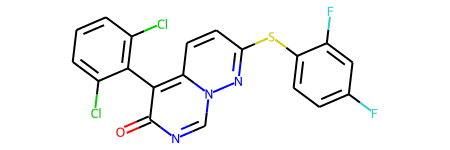

In [963]:
M1 = mol_list [0]
M1

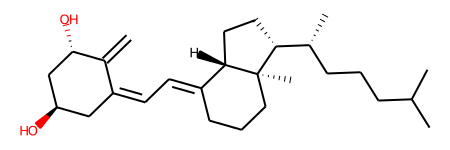

In [964]:
M2 = mol_list [1]
M2

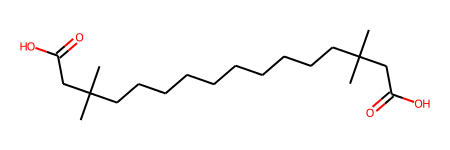

In [965]:
M3 = mol_list [2]
M3

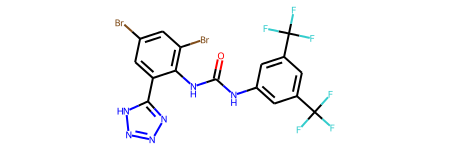

In [966]:
M4 = mol_list [3]
M4

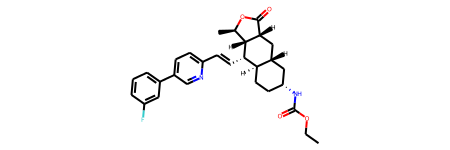

In [967]:
M5 = mol_list [4]
M5

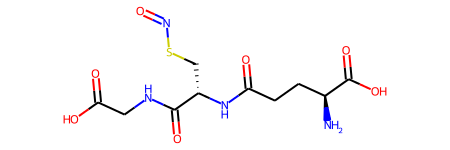

In [968]:
M6 = mol_list [5]
M6

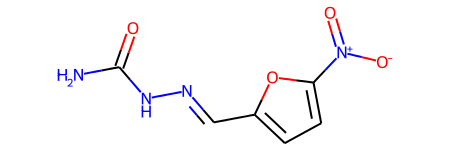

In [969]:
M7 = mol_list [6]
M7

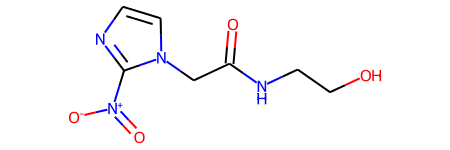

In [970]:
M8 = mol_list [7]
M8

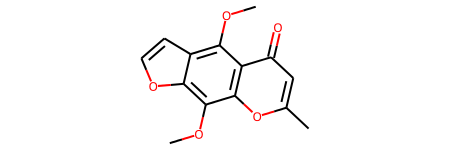

In [971]:
M9 = mol_list [8]
M9

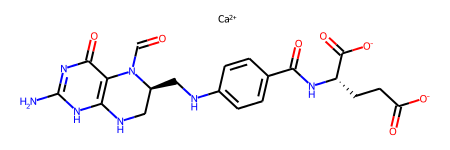

In [972]:
M10= mol_list [9]
M10

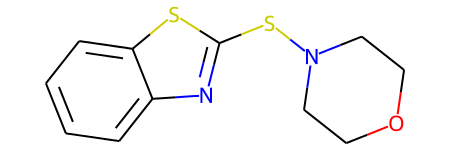

In [973]:
M11= mol_list [10]
M11

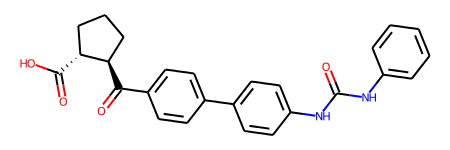

In [974]:
M12= mol_list [11]
M12

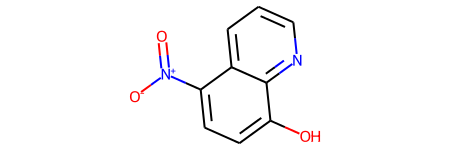

In [975]:
M13= mol_list [12]
M13

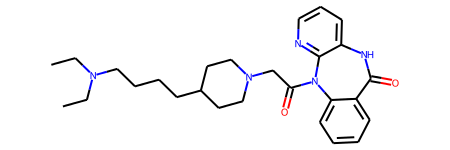

In [976]:
M14= mol_list [13]
M14

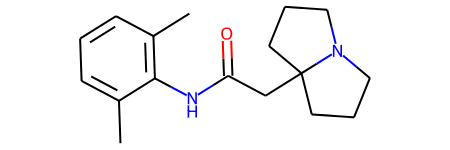

In [977]:
M15= mol_list [14]
M15

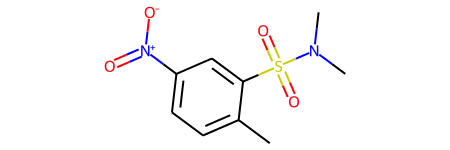

In [978]:
M16= mol_list [15]
M16

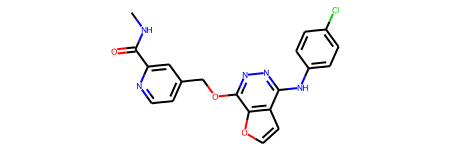

In [979]:
M17= mol_list [16]
M17

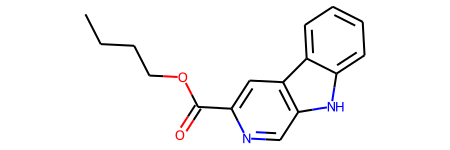

In [980]:
M18= mol_list [17]
M18

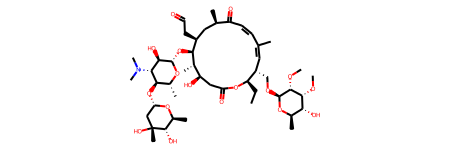

In [981]:
M19= mol_list [18]
M19

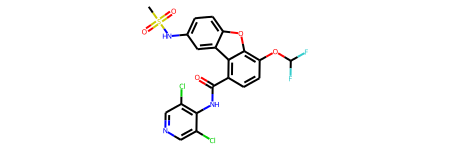

In [982]:
M20= mol_list [19]
M20

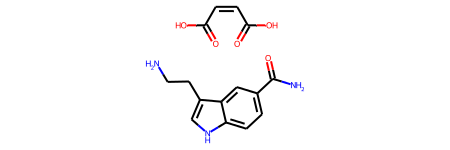

In [983]:
M21= mol_list [20]
M21

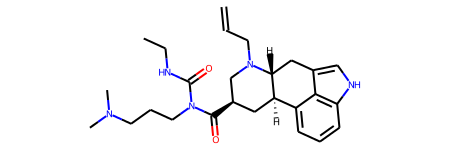

In [984]:
M22= mol_list [21]
M22

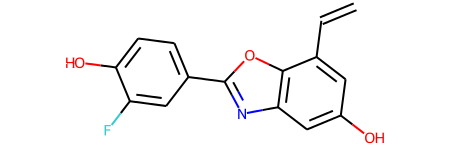

In [985]:
M23= mol_list [22]
M23

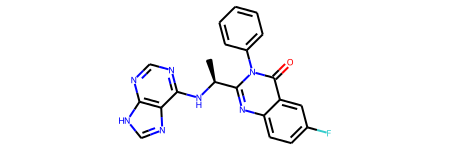

In [986]:
M24= mol_list [23]
M24

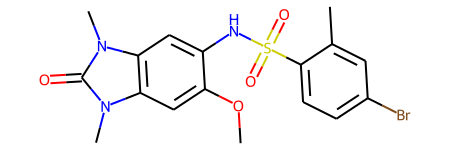

In [987]:
M25= mol_list [24]
M25

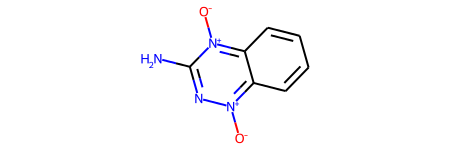

In [988]:
M26= mol_list [25]
M26

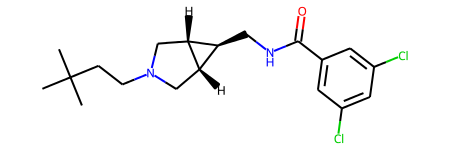

In [989]:
M27= mol_list [26]
M27

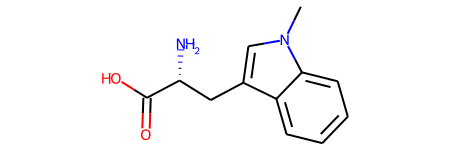

In [990]:
M28= mol_list [27]
M28

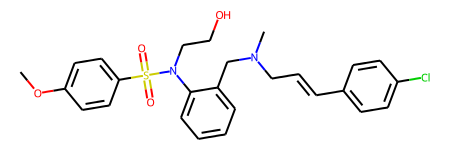

In [991]:
M29= mol_list [28]
M29

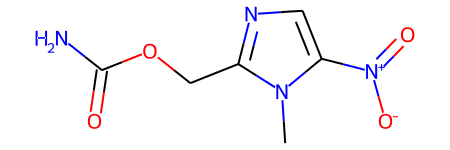

In [992]:
M30= mol_list [29]
M30

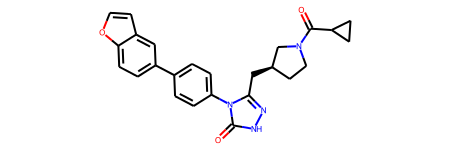

In [993]:
M31= mol_list [30]
M31

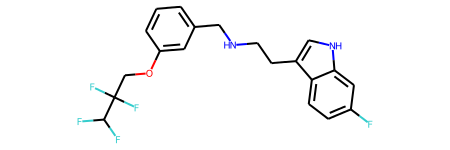

In [994]:
M32= mol_list [31]
M32

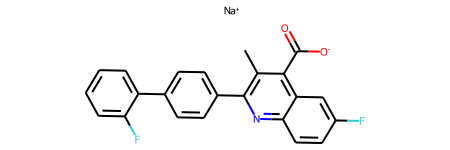

In [995]:
M33= mol_list [32]
M33

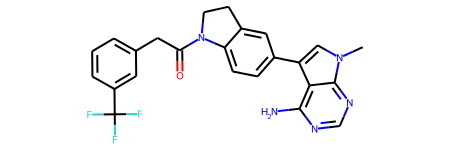

In [996]:
M34= mol_list [33]
M34

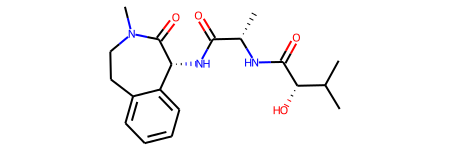

In [997]:
M35= mol_list [34]
M35

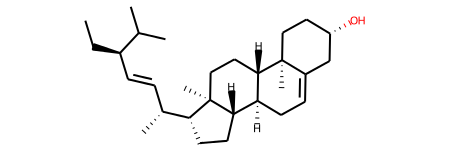

In [998]:
M36= mol_list [35]
M36

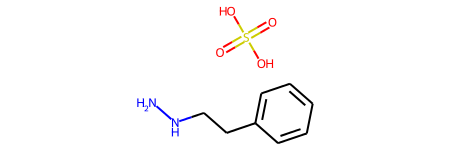

In [999]:
M37= mol_list [36]
M37

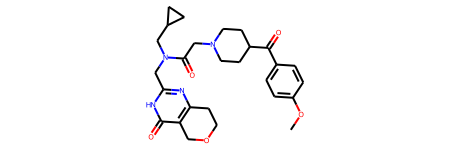

In [1000]:
M38= mol_list [37]
M38


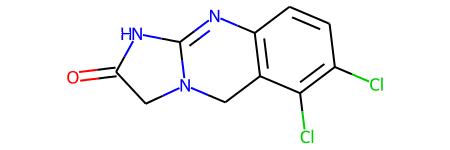

In [1001]:
M39= mol_list [38]
M39

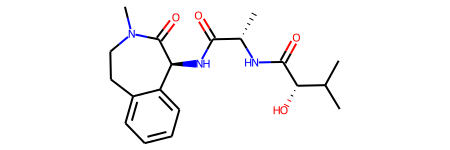

In [1002]:
M40= mol_list [39]
M40

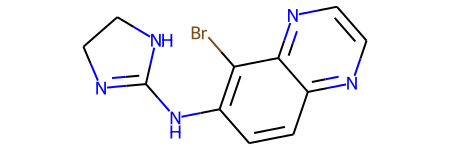

In [1003]:
M41= mol_list [40]
M41

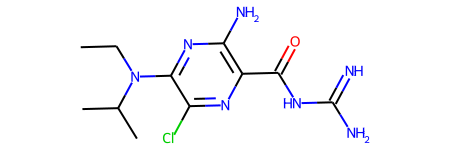

In [1004]:
M42= mol_list [41]
M42

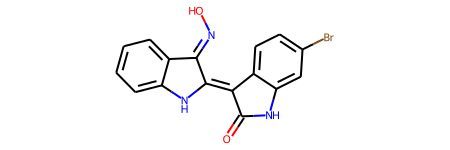

In [1005]:
M43= mol_list [42]
M43

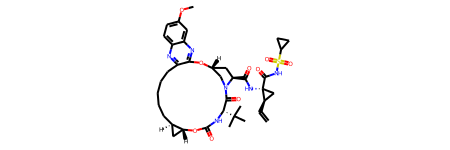

In [1006]:
M44= mol_list [43]
M44

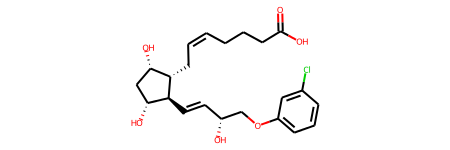

In [1007]:
M45= mol_list [44]
M45

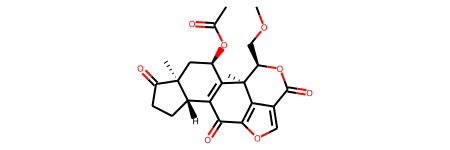

In [1008]:
M46= mol_list [45]
M46

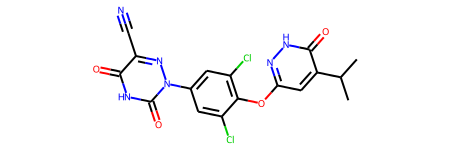

In [1009]:
M47= mol_list [46]
M47

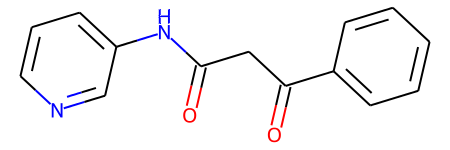

In [1010]:
M48= mol_list [47]
M48

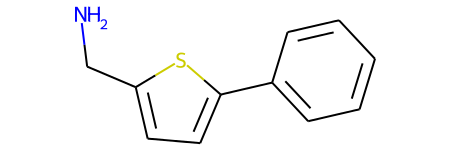

In [1011]:
M49= mol_list [48]
M49

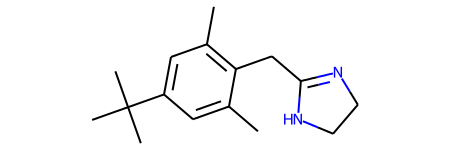

In [1012]:
M50= mol_list [49]
M50

In [1013]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 3,
 9,
 15,
 45,
 64,
 98,
 116,
 117,
 118,
 134,
 147,
 165,
 202,
 247,
 305,
 314,
 356,
 366,
 378,
 386,
 428,
 463,
 552,
 553,
 561,
 597,
 638,
 640,
 646,
 650,
 659,
 699,
 723,
 726,
 754,
 816,
 849,
 875,
 899,
 904,
 925,
 932,
 935,
 946,
 974,
 997]

In [1015]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[1,
 3,
 9,
 15,
 45,
 64,
 98,
 116,
 117,
 118,
 134,
 147,
 165,
 202,
 247,
 305,
 314,
 356,
 366,
 378,
 386,
 428,
 463,
 552,
 553,
 561,
 597,
 638,
 640,
 646,
 650,
 659,
 699,
 723,
 726,
 754,
 816,
 849,
 875,
 899,
 904,
 925,
 932,
 935,
 946,
 974,
 997]

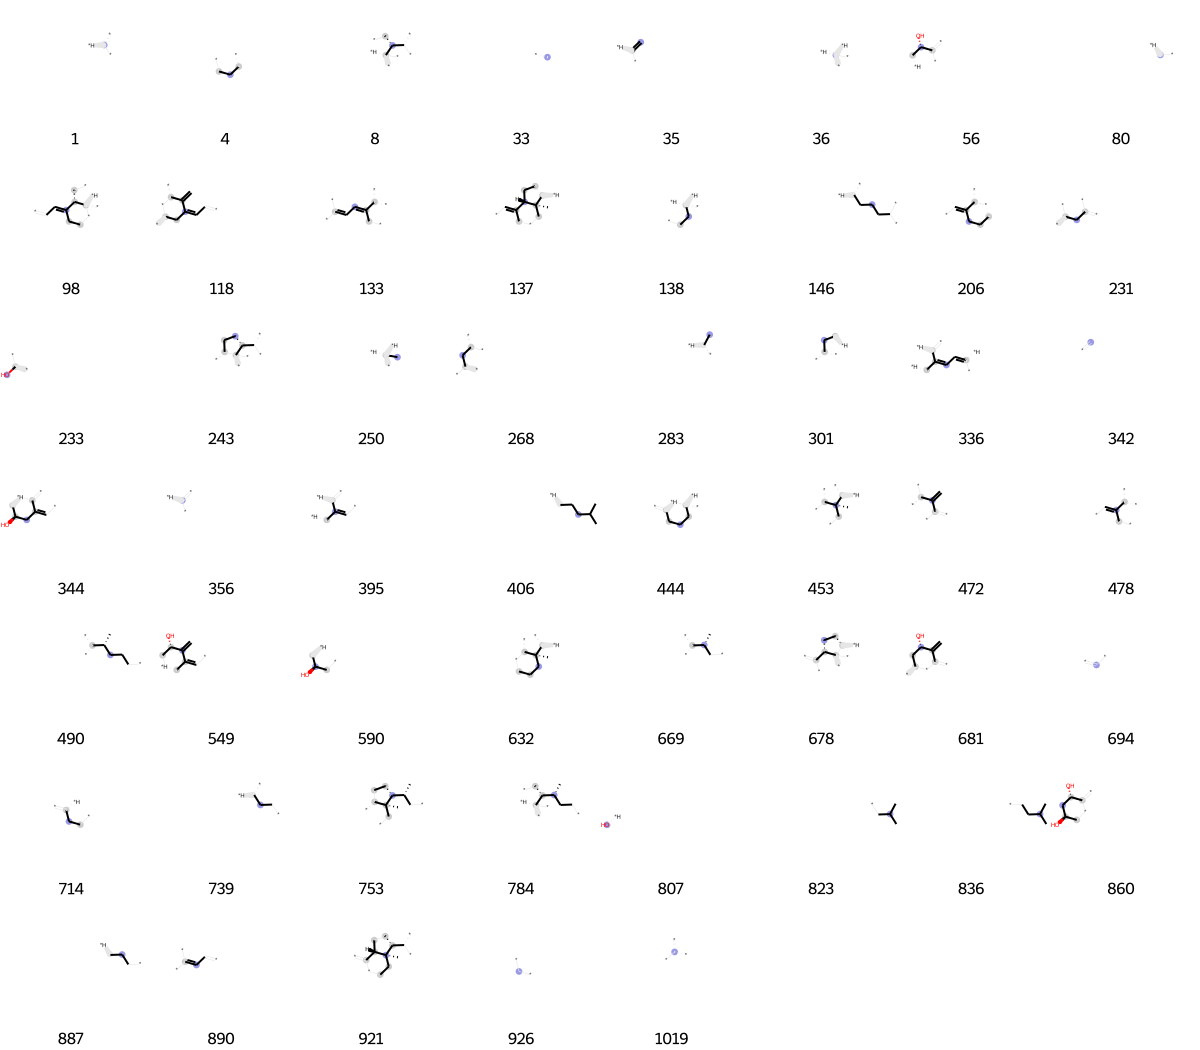

In [1016]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1017]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 37,
 80,
 114,
 119,
 143,
 284,
 323,
 389,
 392,
 587,
 650,
 713,
 795,
 807,
 852,
 860,
 887,
 893]

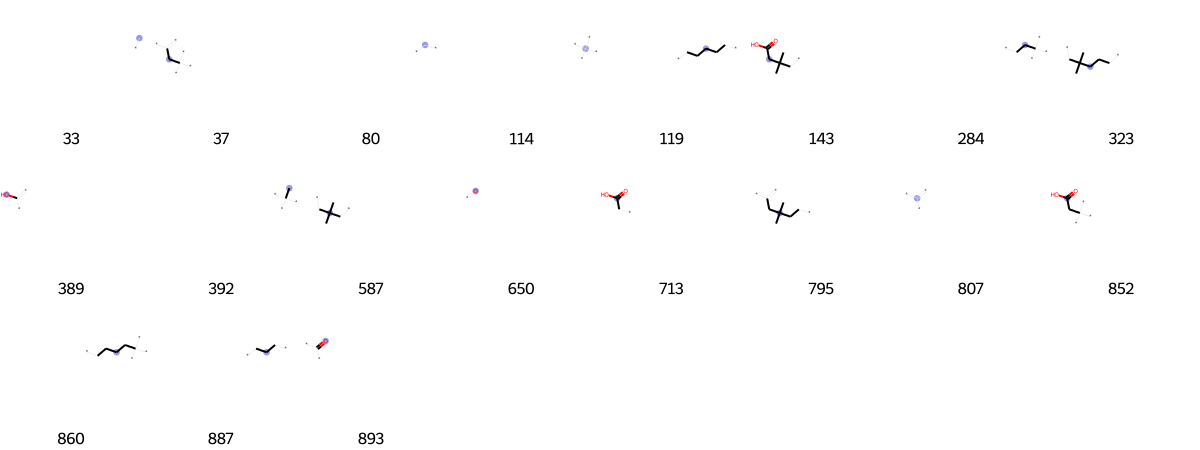

In [1018]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1019]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[56,
 73,
 74,
 77,
 84,
 90,
 105,
 114,
 128,
 134,
 140,
 186,
 191,
 236,
 254,
 260,
 289,
 293,
 352,
 356,
 378,
 381,
 393,
 429,
 585,
 607,
 625,
 650,
 728,
 792,
 807,
 809,
 833,
 841,
 849,
 873,
 875,
 893,
 903,
 904,
 908,
 909,
 922,
 929,
 965,
 966,
 990]

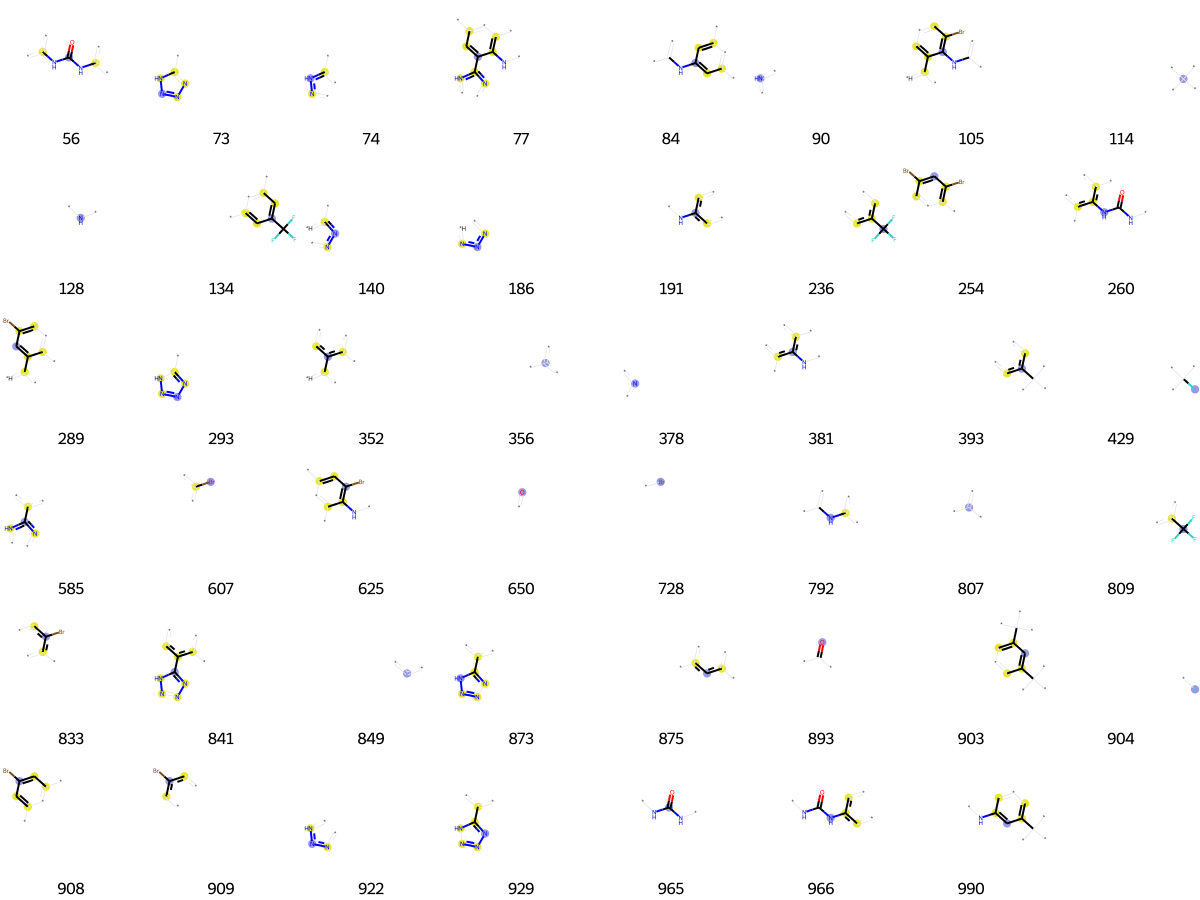

In [1020]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1022]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[9,
 10,
 15,
 33,
 64,
 80,
 128,
 136,
 147,
 182,
 185,
 204,
 214,
 230,
 242,
 259,
 268,
 285,
 294,
 301,
 314,
 356,
 373,
 378,
 387,
 411,
 428,
 448,
 455,
 463,
 496,
 511,
 522,
 539,
 585,
 610,
 622,
 628,
 633,
 646,
 650,
 656,
 694,
 695,
 698,
 699,
 722,
 726,
 734,
 736,
 750,
 785,
 799,
 807,
 818,
 825,
 835,
 849,
 854,
 875,
 879,
 889,
 893,
 896,
 899,
 904,
 926,
 941,
 963,
 977,
 1019]

In [1023]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

RuntimeError: ignored

In [ ]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

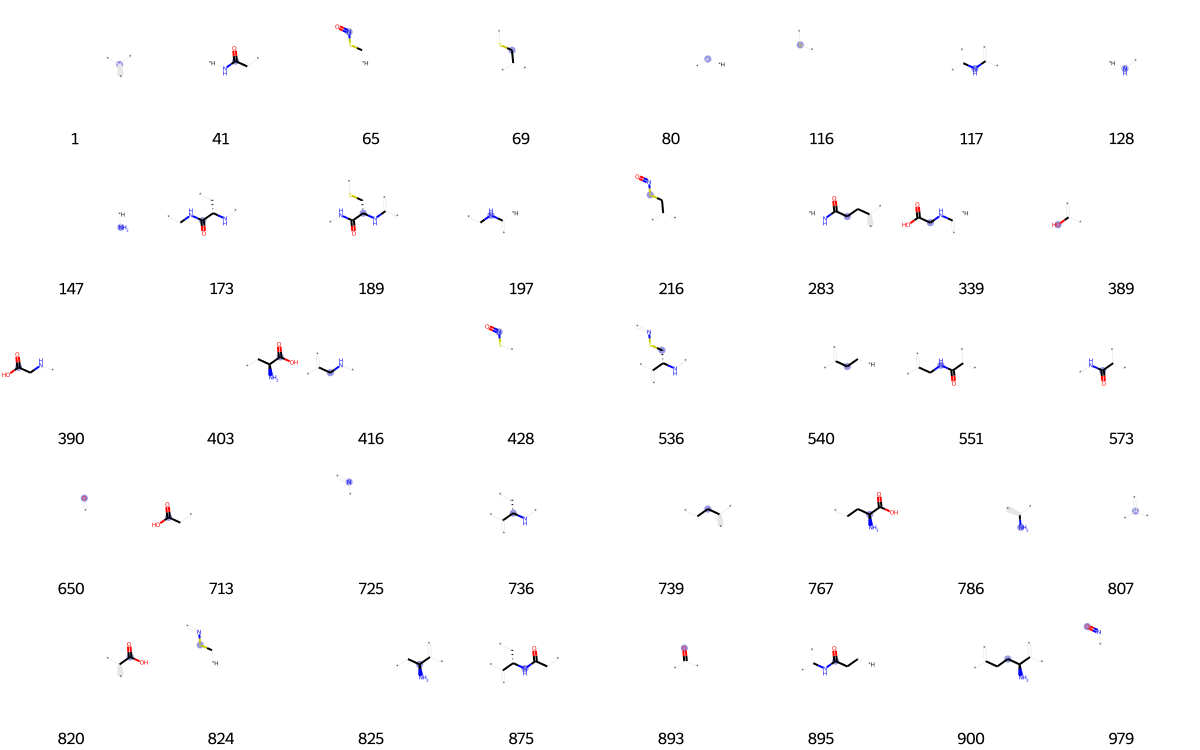

In [1025]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1026]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[11,
 32,
 128,
 140,
 147,
 171,
 192,
 220,
 255,
 270,
 318,
 356,
 364,
 502,
 580,
 631,
 650,
 656,
 694,
 715,
 725,
 726,
 753,
 770,
 794,
 807,
 838,
 843,
 849,
 864,
 893,
 924,
 939,
 984]

In [1028]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[41,
 77,
 80,
 128,
 170,
 171,
 197,
 222,
 288,
 356,
 378,
 387,
 395,
 400,
 428,
 431,
 473,
 577,
 597,
 622,
 650,
 667,
 689,
 715,
 723,
 753,
 807,
 838,
 839,
 842,
 849,
 893,
 935,
 939,
 1011,
 1018]

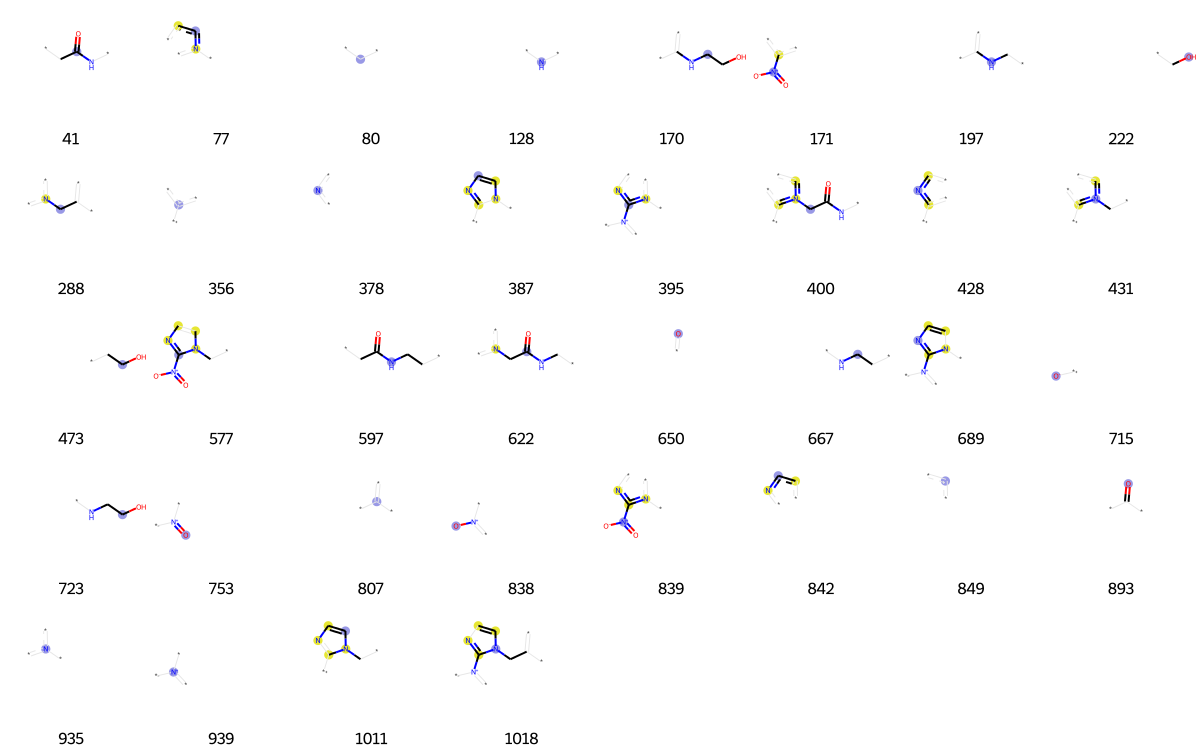

In [1030]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [1031]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[33,
 62,
 133,
 166,
 175,
 207,
 209,
 280,
 314,
 333,
 356,
 419,
 448,
 512,
 518,
 551,
 553,
 575,
 580,
 612,
 650,
 656,
 695,
 698,
 718,
 726,
 787,
 831,
 841,
 849,
 875,
 920,
 960,
 992]

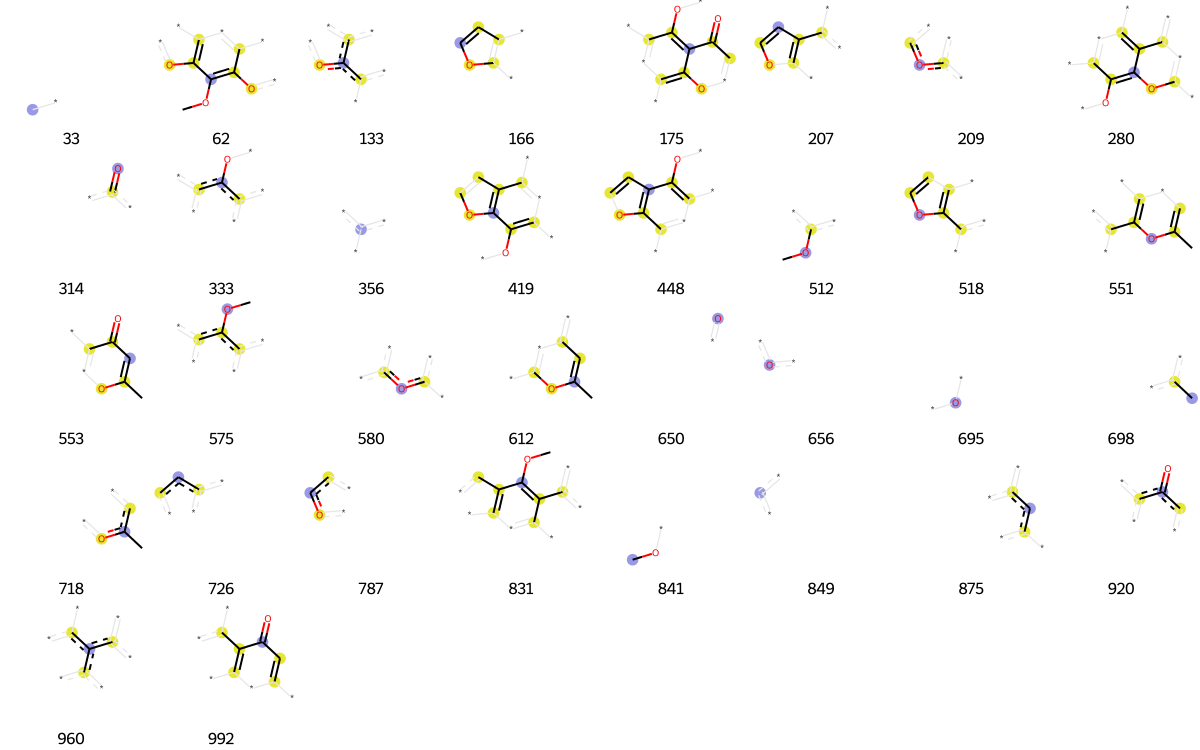

In [1032]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1035]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[1,
 12,
 27,
 62,
 78,
 80,
 90,
 92,
 100,
 117,
 127,
 128,
 134,
 146,
 147,
 191,
 202,
 205,
 284,
 314,
 334,
 356,
 361,
 378,
 392,
 411,
 433,
 457,
 470,
 484,
 486,
 528,
 540,
 580,
 641,
 643,
 650,
 673,
 694,
 697,
 714,
 715,
 721,
 726,
 735,
 736,
 739,
 766,
 785,
 807,
 815,
 818,
 828,
 831,
 842,
 843,
 849,
 893,
 896,
 905,
 926,
 935,
 973,
 1004,
 1019]

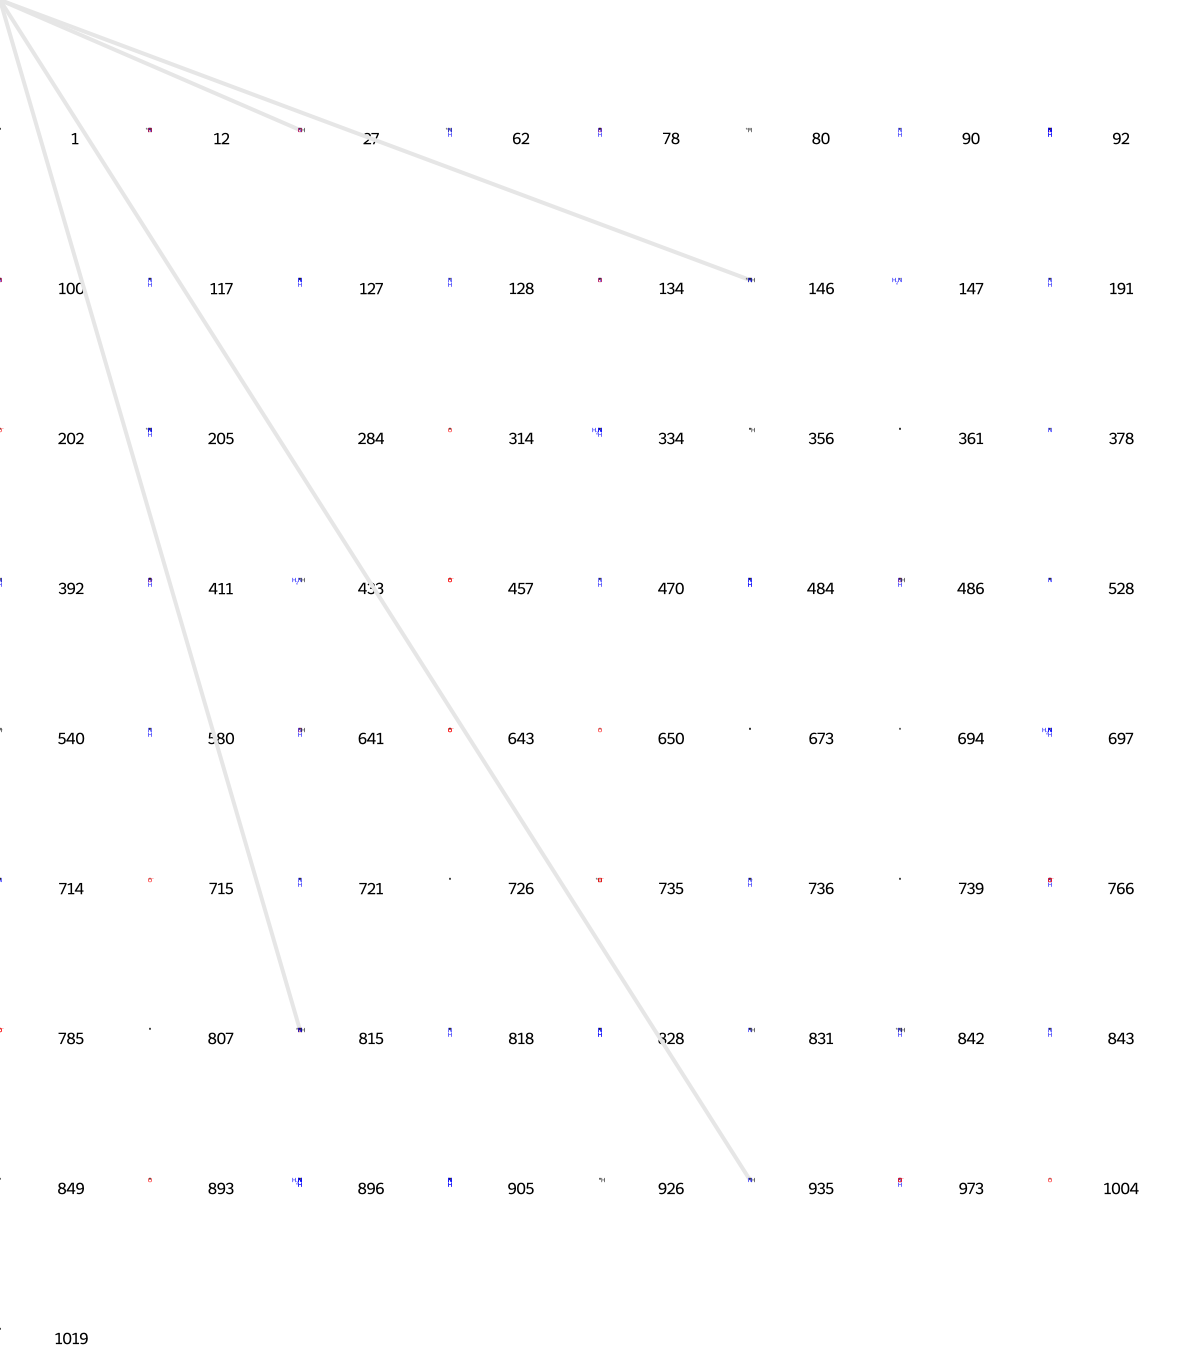

In [1036]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1037]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[64,
 73,
 116,
 162,
 175,
 289,
 298,
 356,
 378,
 381,
 417,
 426,
 453,
 456,
 461,
 518,
 523,
 557,
 656,
 675,
 690,
 726,
 793,
 831,
 849,
 855,
 857,
 885,
 926,
 935,
 950,
 980,
 999]

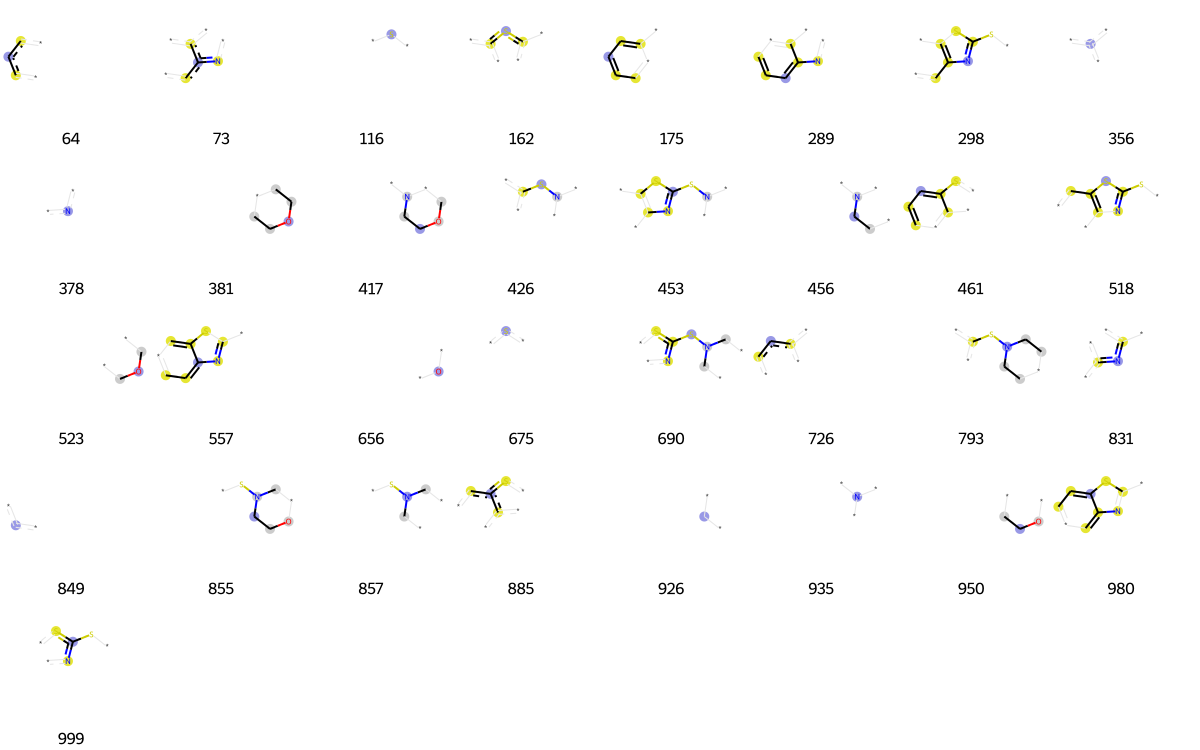

In [1038]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [ ]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

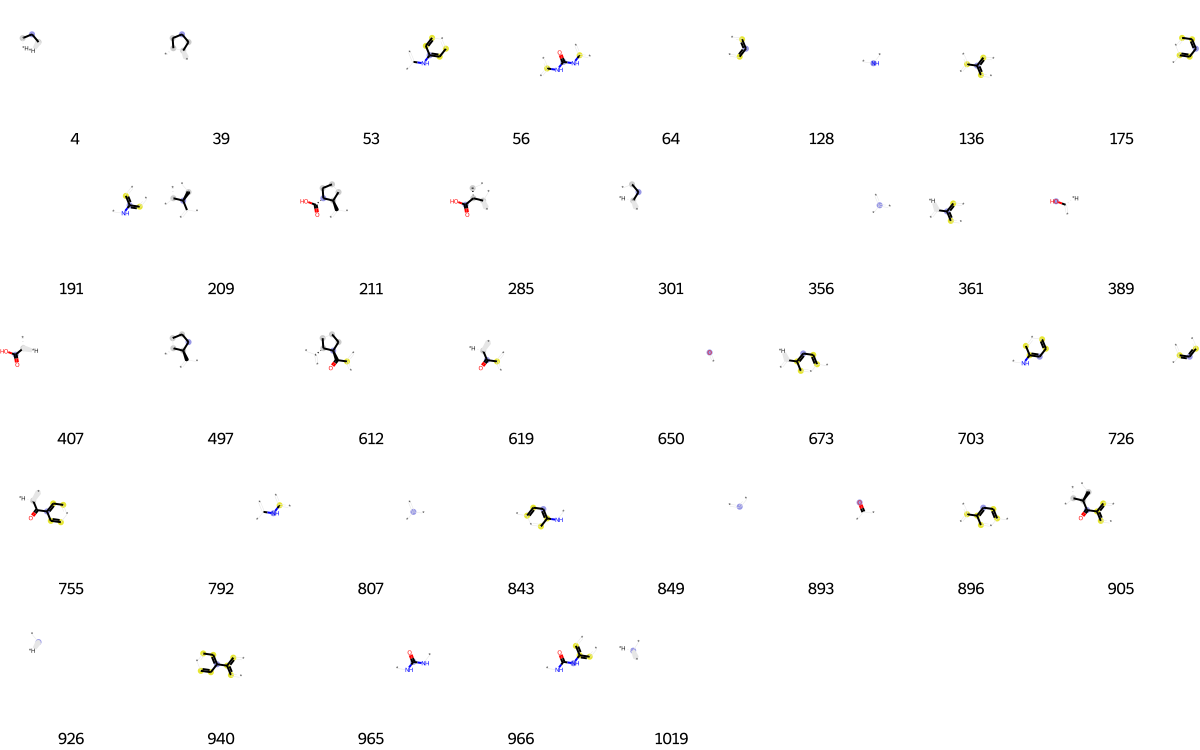

In [1040]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1041]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[19,
 64,
 171,
 245,
 283,
 324,
 333,
 354,
 356,
 378,
 394,
 428,
 448,
 451,
 549,
 578,
 583,
 650,
 700,
 715,
 716,
 726,
 753,
 807,
 838,
 842,
 849,
 915,
 935,
 939]

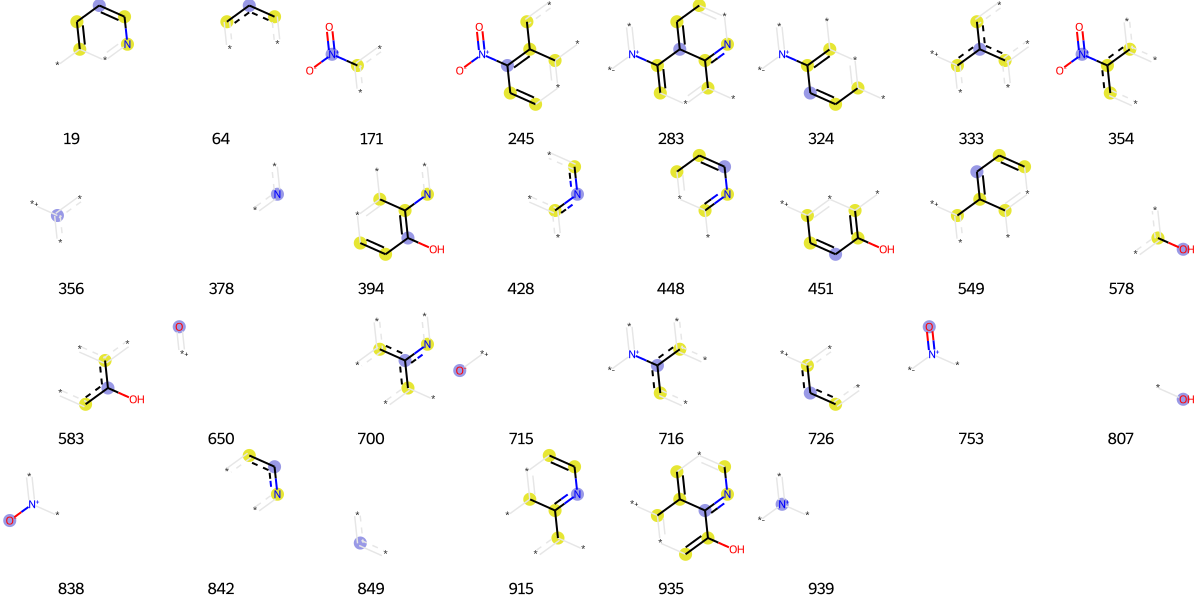

In [1042]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1043]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[19,
 29,
 33,
 36,
 64,
 80,
 90,
 100,
 114,
 129,
 130,
 175,
 237,
 251,
 271,
 277,
 288,
 289,
 294,
 301,
 314,
 334,
 352,
 356,
 378,
 420,
 426,
 428,
 446,
 448,
 456,
 461,
 474,
 527,
 538,
 557,
 568,
 620,
 623,
 633,
 645,
 650,
 712,
 726,
 767,
 800,
 807,
 832,
 842,
 849,
 881,
 887,
 893,
 926,
 927,
 932,
 935,
 957,
 958,
 984,
 1009,
 1016,
 1019]

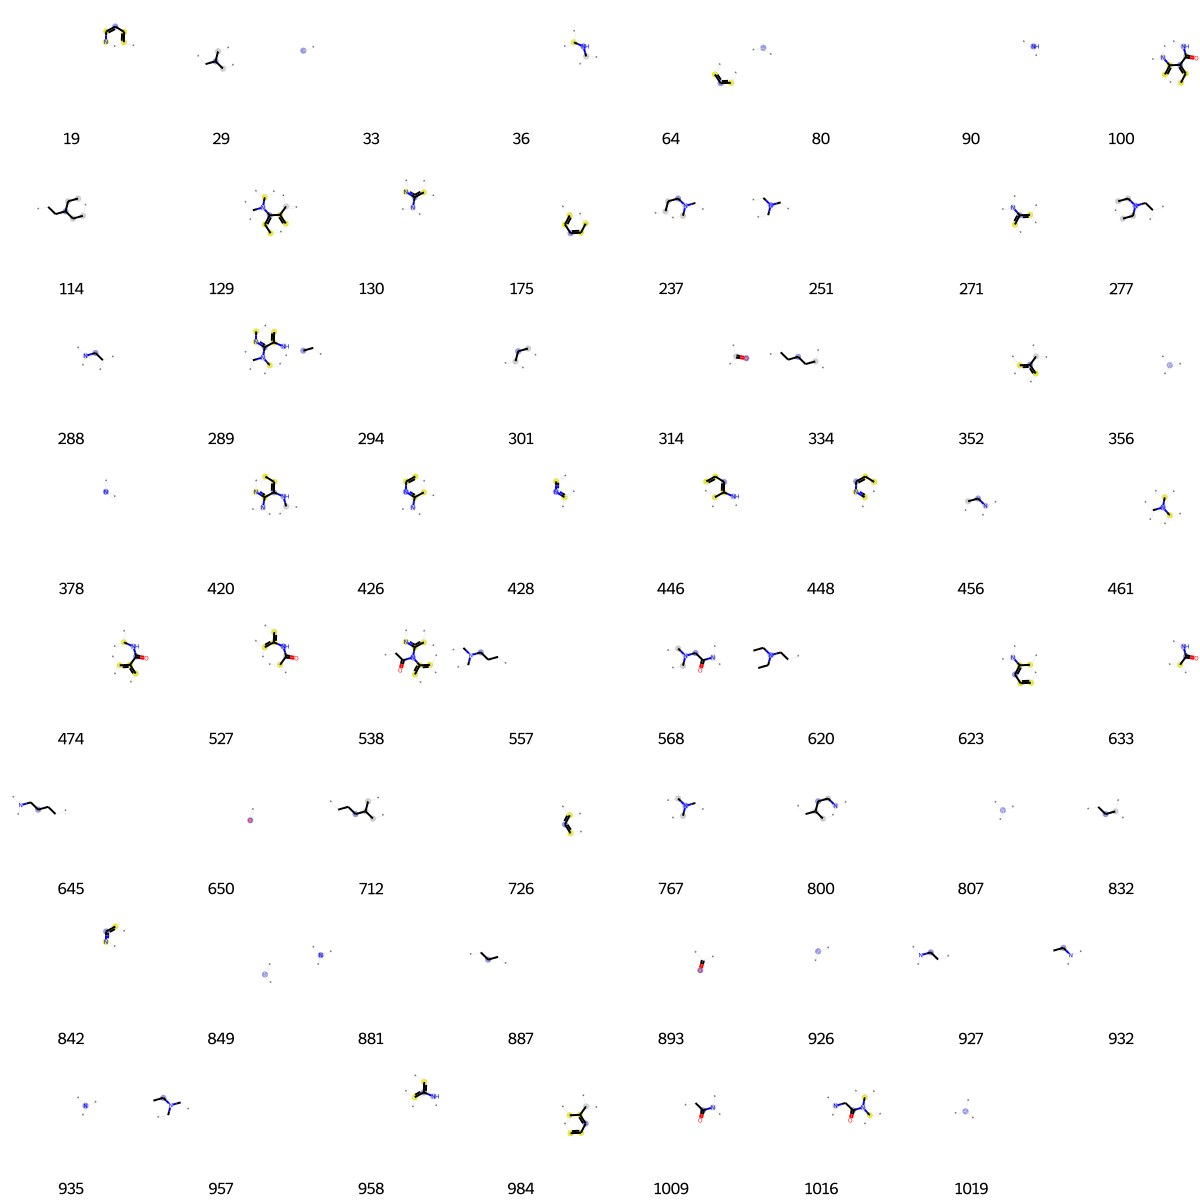

In [1044]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1045]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[4,
 15,
 33,
 36,
 41,
 43,
 52,
 64,
 80,
 128,
 138,
 202,
 211,
 269,
 356,
 367,
 381,
 384,
 456,
 461,
 650,
 698,
 707,
 726,
 792,
 802,
 807,
 849,
 855,
 893,
 901,
 926,
 935,
 942,
 952,
 975]

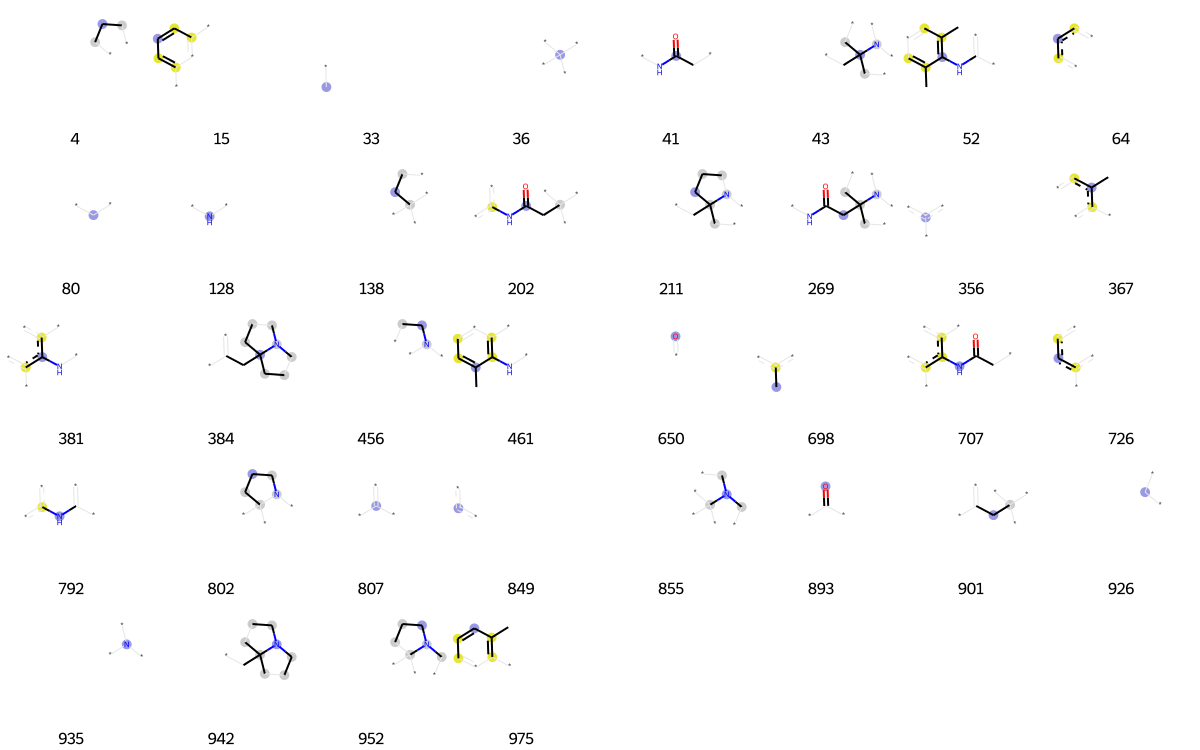

In [1046]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1047]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[33,
 112,
 139,
 171,
 250,
 259,
 303,
 350,
 356,
 367,
 392,
 452,
 466,
 650,
 667,
 698,
 715,
 726,
 738,
 753,
 763,
 785,
 790,
 815,
 838,
 849,
 875,
 881,
 916,
 939]

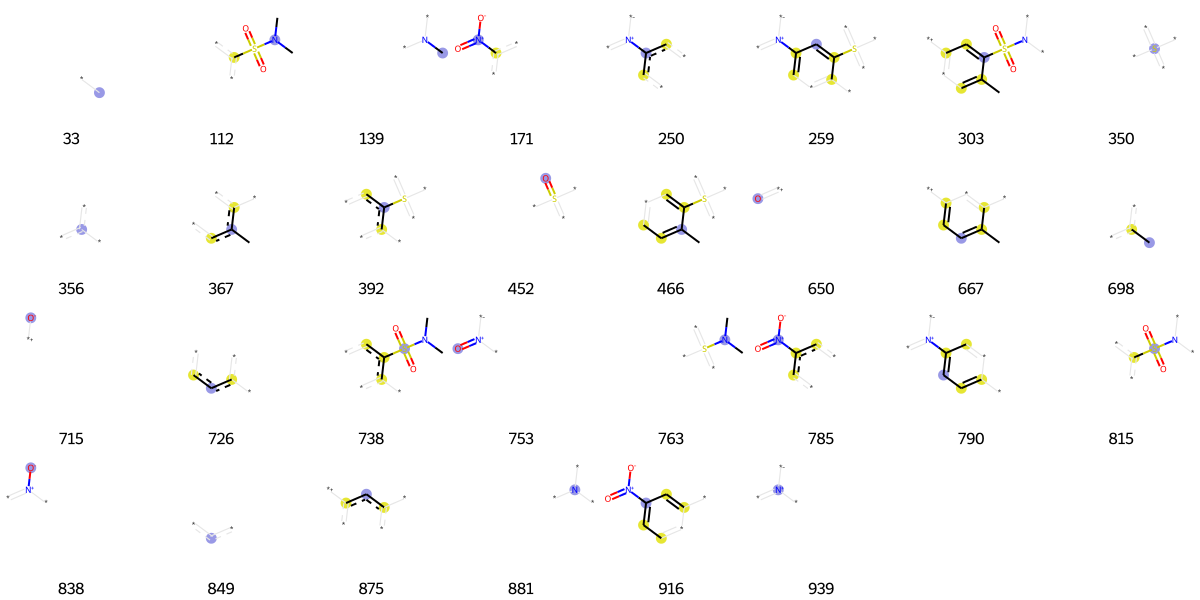

In [1048]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1049]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


[33,
 46,
 66,
 75,
 80,
 107,
 113,
 128,
 133,
 140,
 153,
 166,
 191,
 207,
 209,
 216,
 333,
 345,
 356,
 378,
 401,
 406,
 428,
 431,
 445,
 486,
 491,
 493,
 500,
 518,
 523,
 530,
 552,
 561,
 637,
 650,
 656,
 659,
 693,
 695,
 708,
 726,
 730,
 745,
 751,
 787,
 807,
 816,
 842,
 843,
 849,
 855,
 875,
 888,
 893,
 930]

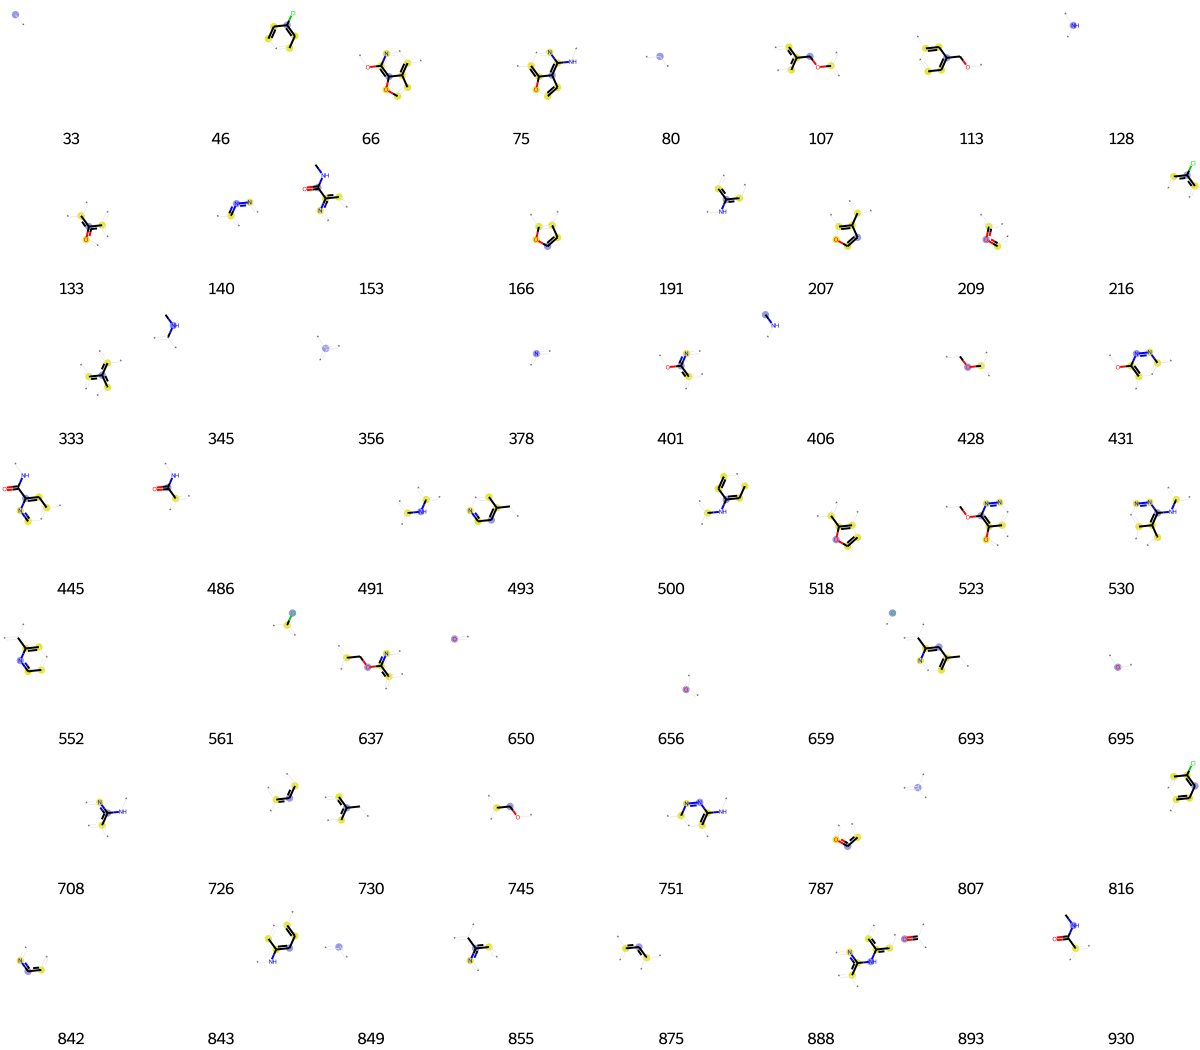

In [1050]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [1051]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[13,
 21,
 33,
 64,
 68,
 80,
 90,
 119,
 145,
 147,
 175,
 275,
 294,
 333,
 356,
 378,
 393,
 428,
 474,
 511,
 549,
 568,
 591,
 602,
 650,
 695,
 701,
 710,
 718,
 720,
 721,
 726,
 759,
 794,
 807,
 849,
 855,
 871,
 875,
 887,
 893]

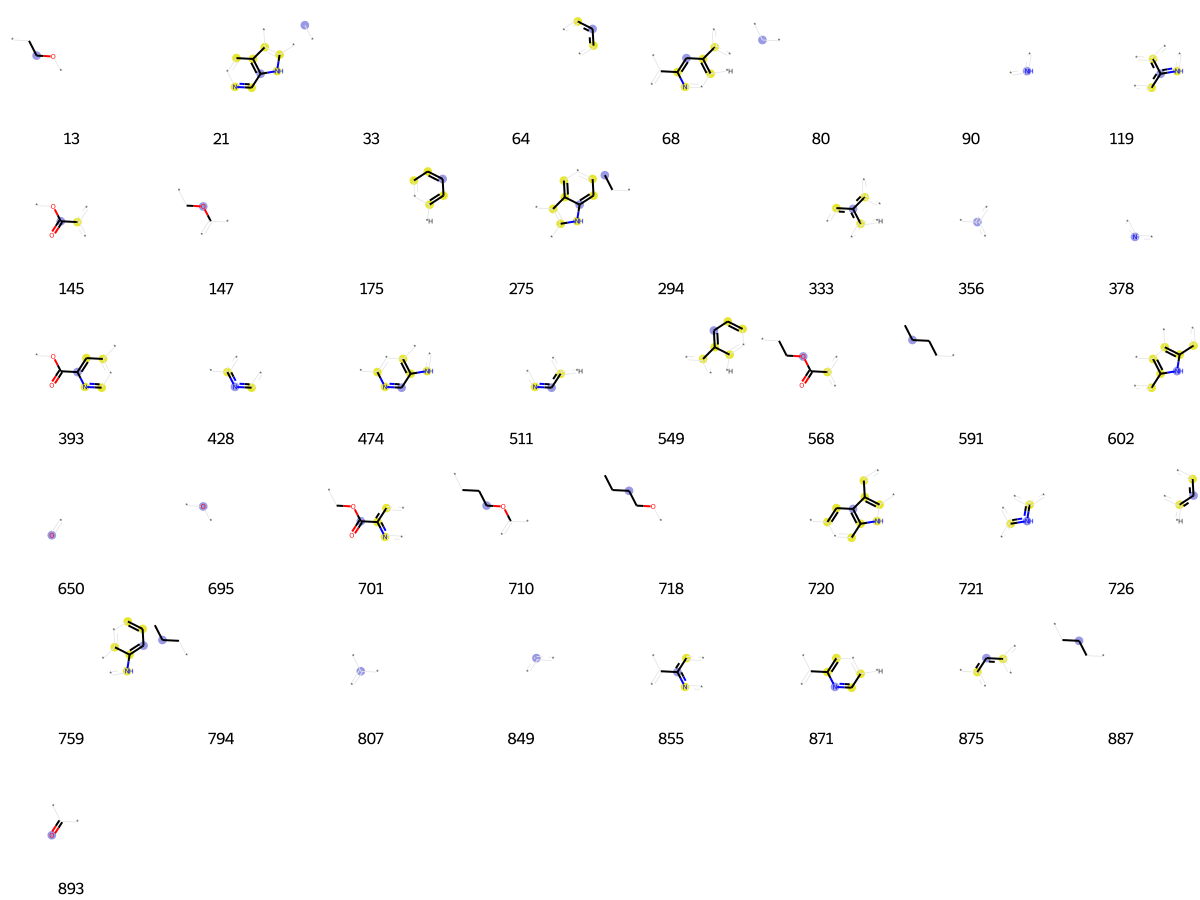

In [1052]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1053]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[4,
 21,
 24,
 33,
 36,
 53,
 73,
 80,
 103,
 107,
 112,
 125,
 127,
 130,
 139,
 161,
 226,
 231,
 232,
 233,
 236,
 242,
 250,
 256,
 268,
 277,
 279,
 285,
 294,
 299,
 314,
 317,
 318,
 352,
 356,
 357,
 403,
 426,
 427,
 430,
 463,
 471,
 484,
 485,
 516,
 530,
 537,
 543,
 547,
 550,
 591,
 610,
 619,
 628,
 639,
 650,
 652,
 656,
 663,
 679,
 687,
 693,
 694,
 695,
 698,
 722,
 739,
 750,
 800,
 807,
 811,
 823,
 825,
 841,
 849,
 861,
 869,
 878,
 881,
 897,
 911,
 912,
 913,
 918,
 926,
 937,
 949,
 970,
 996,
 1004,
 1019]

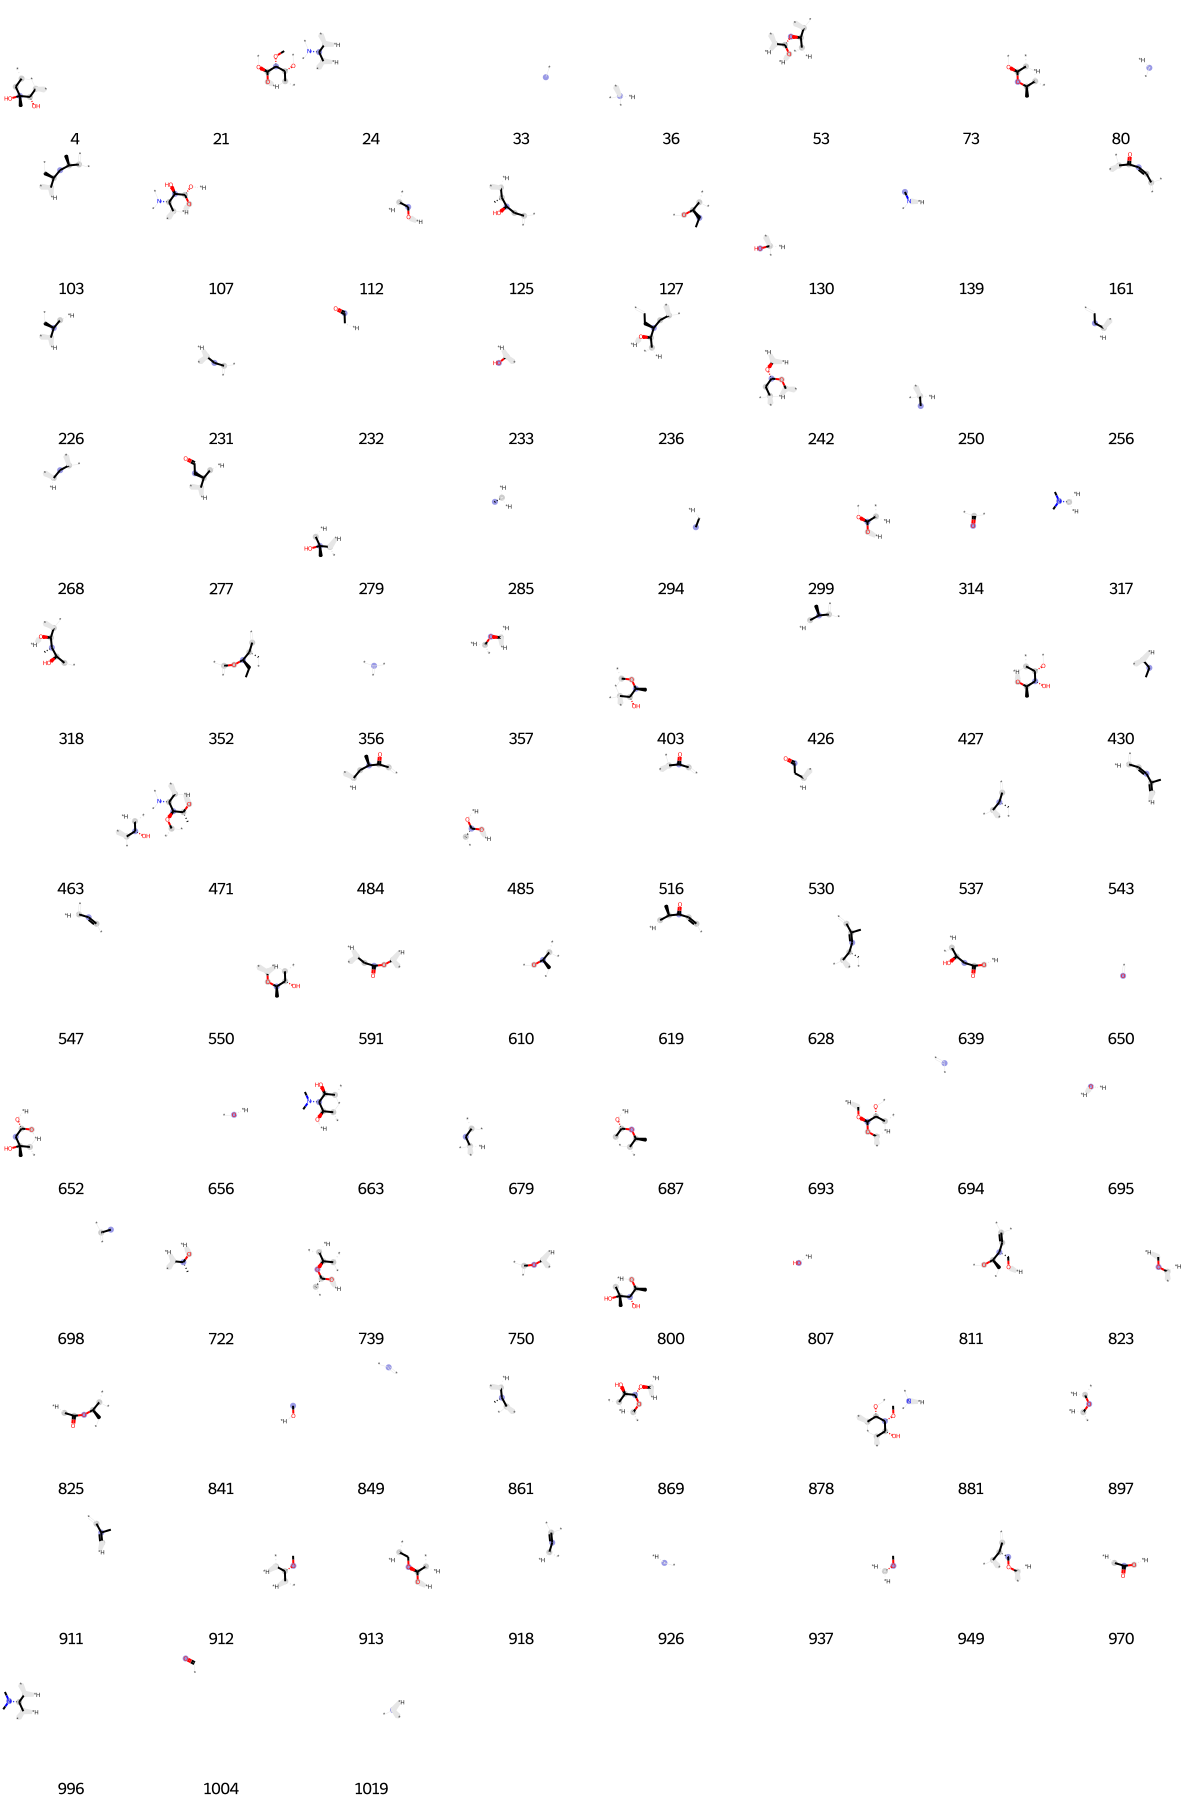

In [1054]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1055]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 26,
 33,
 48,
 67,
 94,
 127,
 128,
 133,
 142,
 191,
 246,
 286,
 333,
 338,
 350,
 356,
 366,
 368,
 378,
 381,
 409,
 432,
 452,
 486,
 511,
 561,
 579,
 580,
 618,
 625,
 650,
 656,
 659,
 664,
 692,
 695,
 723,
 726,
 733,
 736,
 744,
 784,
 786,
 792,
 807,
 834,
 843,
 847,
 849,
 875,
 884,
 893,
 904,
 922,
 934,
 946,
 956,
 960,
 967]

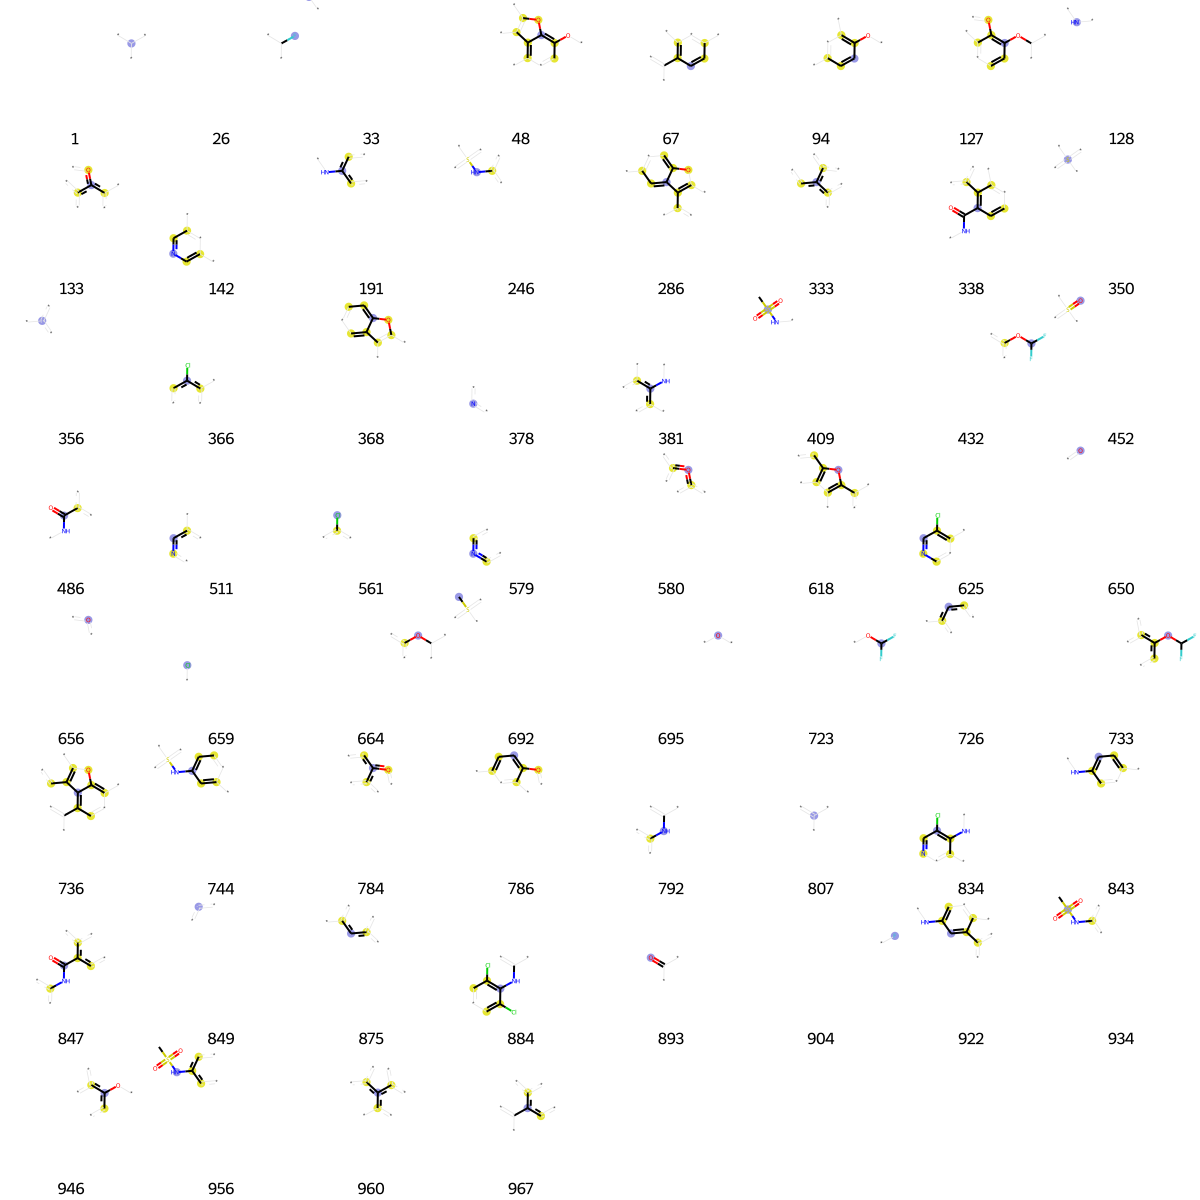

In [1056]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1057]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[31,
 80,
 90,
 119,
 140,
 144,
 147,
 219,
 261,
 309,
 325,
 328,
 332,
 333,
 355,
 356,
 361,
 364,
 389,
 476,
 508,
 650,
 670,
 673,
 694,
 703,
 726,
 728,
 806,
 807,
 816,
 849,
 855,
 875,
 893,
 913,
 915,
 976,
 981]

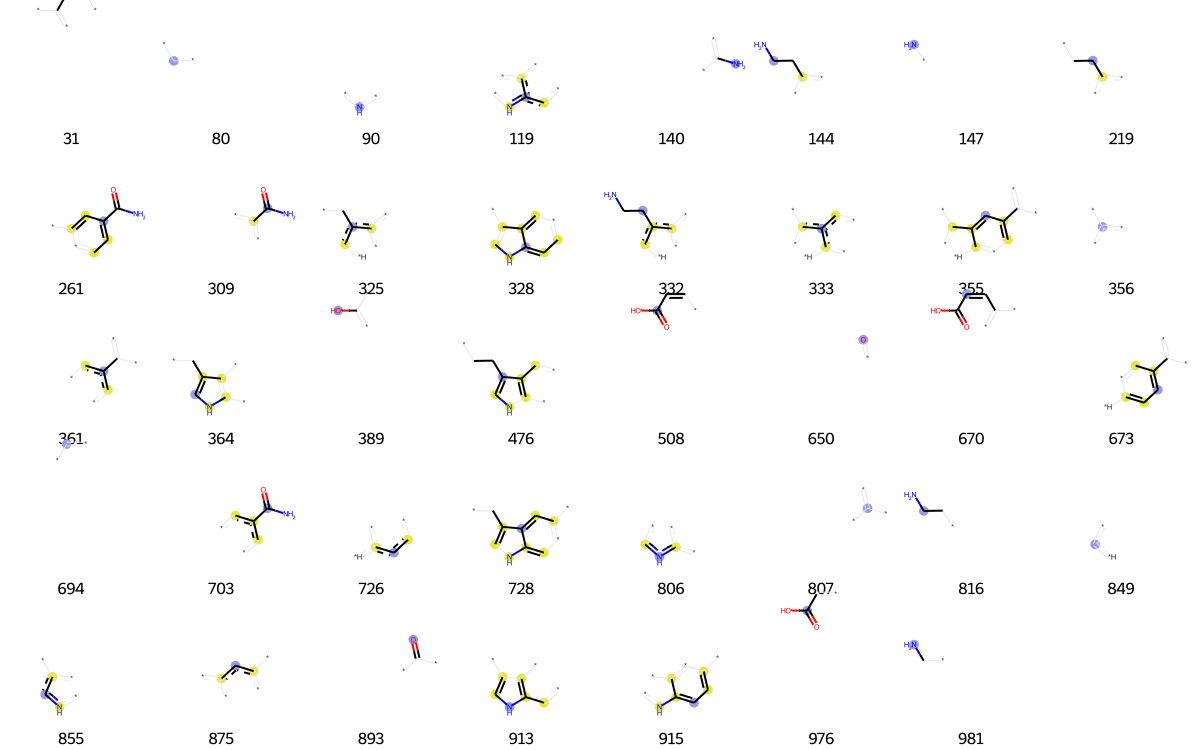

In [1058]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1059]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[3,
 5,
 15,
 33,
 64,
 78,
 80,
 90,
 113,
 119,
 125,
 128,
 139,
 193,
 197,
 212,
 231,
 268,
 269,
 294,
 324,
 342,
 353,
 356,
 371,
 400,
 442,
 455,
 479,
 533,
 580,
 600,
 621,
 624,
 650,
 652,
 665,
 693,
 694,
 702,
 726,
 733,
 739,
 759,
 761,
 773,
 796,
 806,
 807,
 817,
 849,
 855,
 881,
 887,
 893,
 913,
 926,
 927,
 935,
 940,
 946,
 960,
 961,
 971,
 972,
 974,
 982,
 998,
 1019]

In [1060]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

RDKit ERROR: [18:17:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Invariant Violation
RDKit ERROR: no eligible neighbors for chiral center
RDKit ERROR: Violation occurred on line 238 in file /tmp/pip-req-build-nbflxp35/build/temp.linux-x86_64-3.7/rdkit/Code/GraphMol/FileParsers/MolFileStereochem.cpp
RDKit ERROR: Failed Expression: nbrScores.size()
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [18:21:01] Can't kekulize mol.  Unkekulized atoms: 4 7 10 11
RDKit ERROR: 


KekulizeException: ignored

In [1061]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[22,
 23,
 73,
 96,
 133,
 136,
 155,
 167,
 227,
 342,
 356,
 378,
 451,
 508,
 575,
 578,
 580,
 583,
 621,
 625,
 656,
 671,
 694,
 699,
 709,
 726,
 745,
 807,
 811,
 816,
 829,
 831,
 849,
 875,
 896,
 904,
 927,
 937,
 961,
 963]

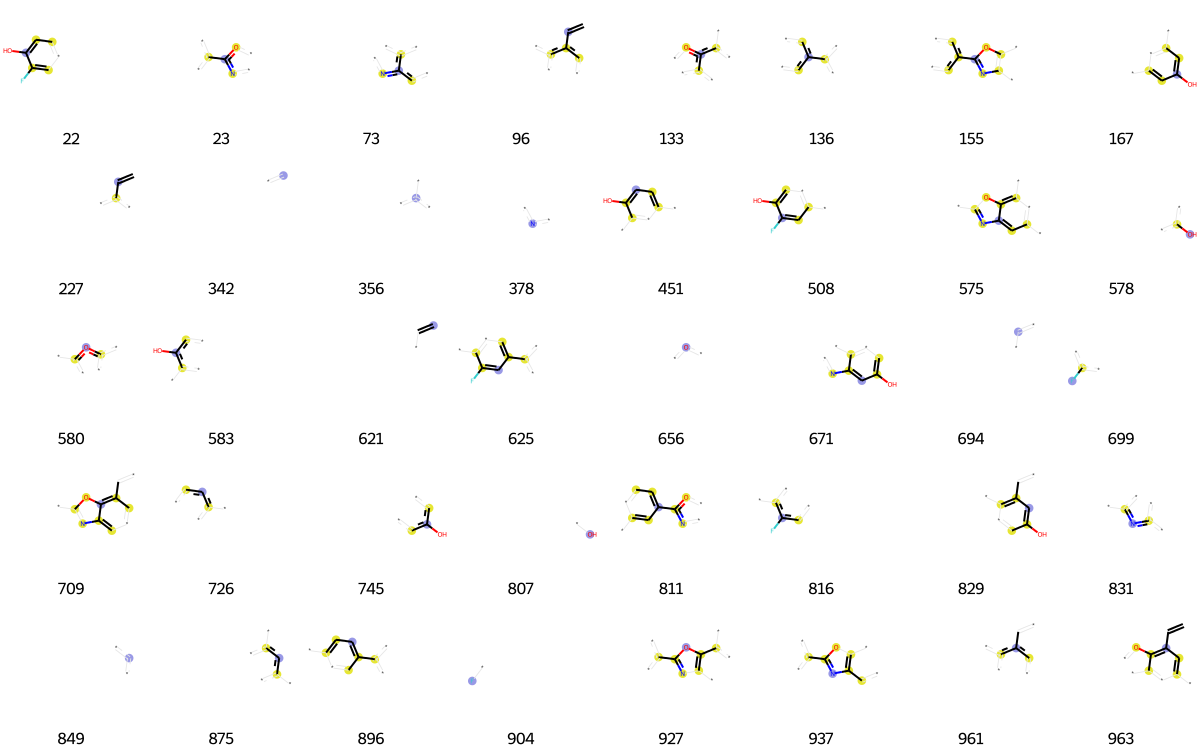

In [1062]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1063]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 25,
 33,
 58,
 64,
 73,
 90,
 128,
 147,
 151,
 175,
 193,
 253,
 283,
 298,
 314,
 333,
 335,
 343,
 356,
 378,
 386,
 389,
 428,
 463,
 488,
 489,
 504,
 517,
 578,
 603,
 646,
 650,
 690,
 699,
 700,
 708,
 713,
 726,
 763,
 786,
 787,
 801,
 806,
 831,
 834,
 839,
 849,
 859,
 875,
 904,
 935,
 961,
 969,
 983,
 1015]

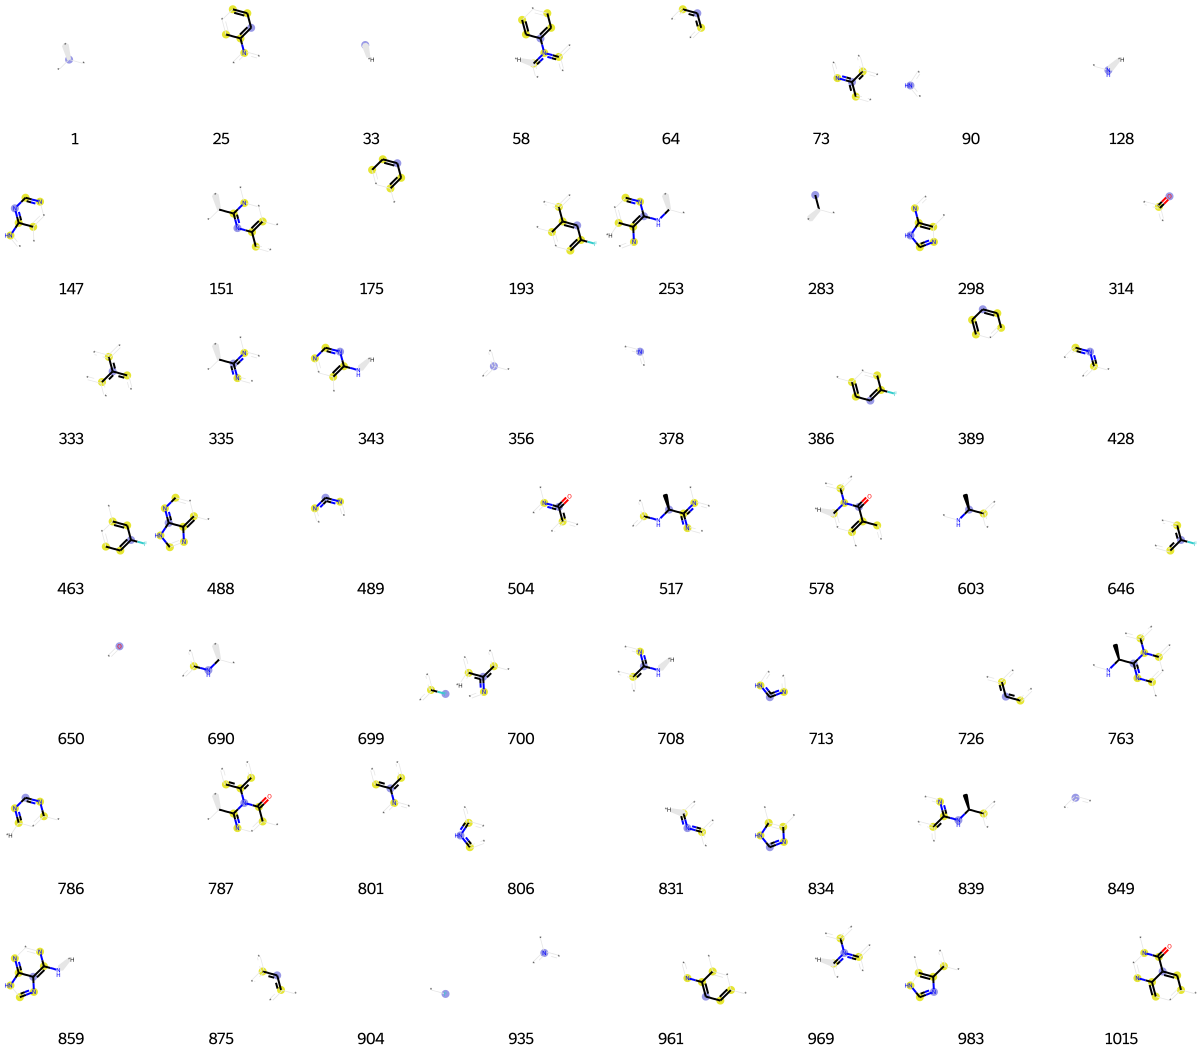

In [1064]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1065]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 45,
 121,
 128,
 133,
 200,
 214,
 226,
 246,
 249,
 300,
 314,
 350,
 356,
 360,
 367,
 392,
 400,
 452,
 502,
 503,
 512,
 564,
 607,
 640,
 641,
 650,
 695,
 698,
 726,
 728,
 766,
 771,
 804,
 841,
 848,
 849,
 875,
 909,
 935,
 946,
 1019]

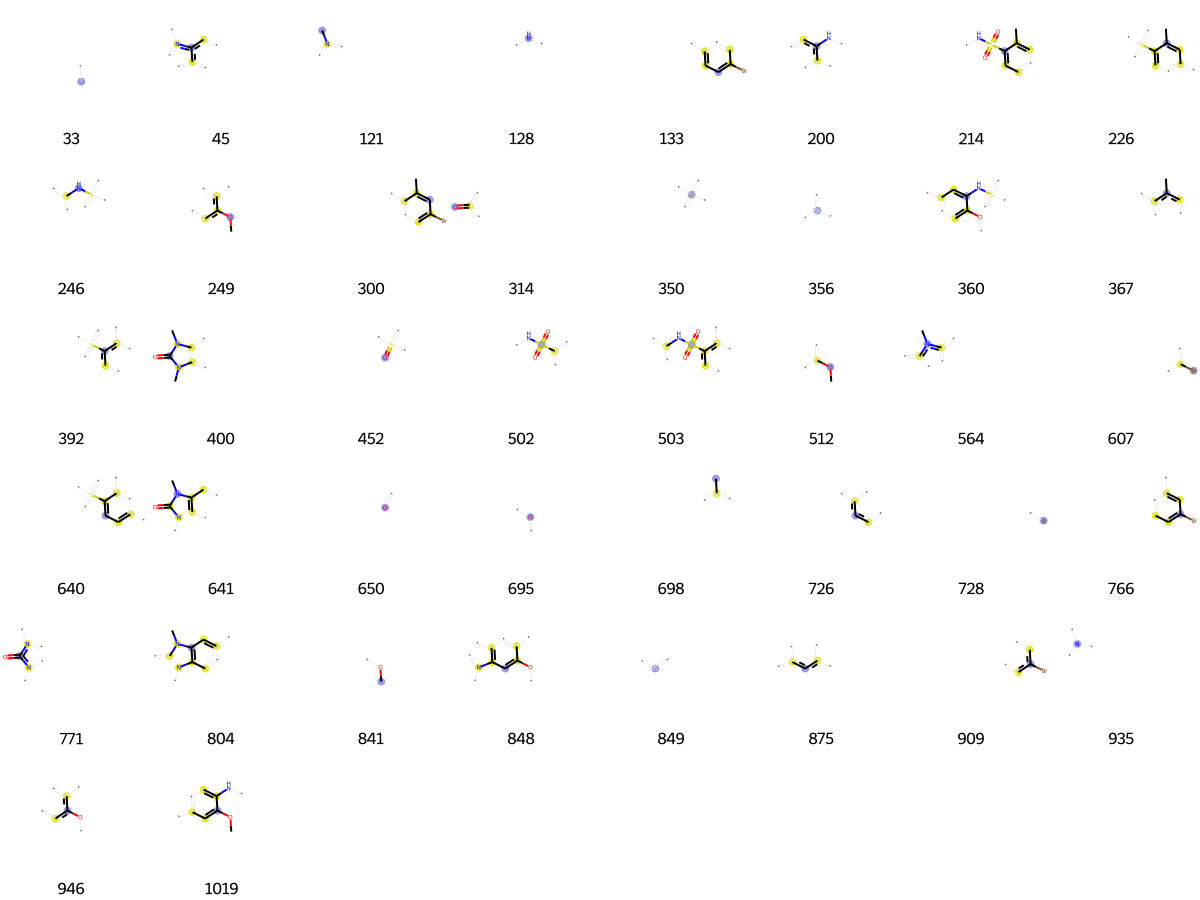

In [1066]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1067]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[35,
 64,
 147,
 175,
 290,
 343,
 356,
 378,
 433,
 444,
 463,
 479,
 503,
 513,
 588,
 594,
 609,
 715,
 726,
 748,
 780,
 849,
 983]

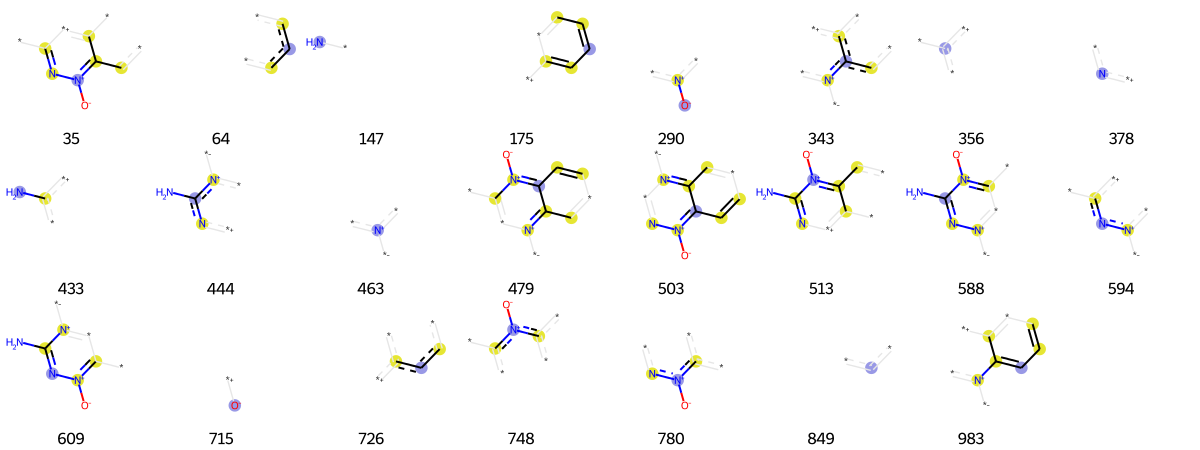

In [1068]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1069]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[33,
 41,
 80,
 114,
 121,
 128,
 196,
 197,
 211,
 216,
 265,
 284,
 356,
 361,
 392,
 452,
 475,
 486,
 539,
 561,
 580,
 622,
 650,
 659,
 685,
 723,
 727,
 739,
 767,
 807,
 834,
 849,
 871,
 875,
 893,
 926,
 932,
 935,
 994,
 997,
 1015,
 1019]

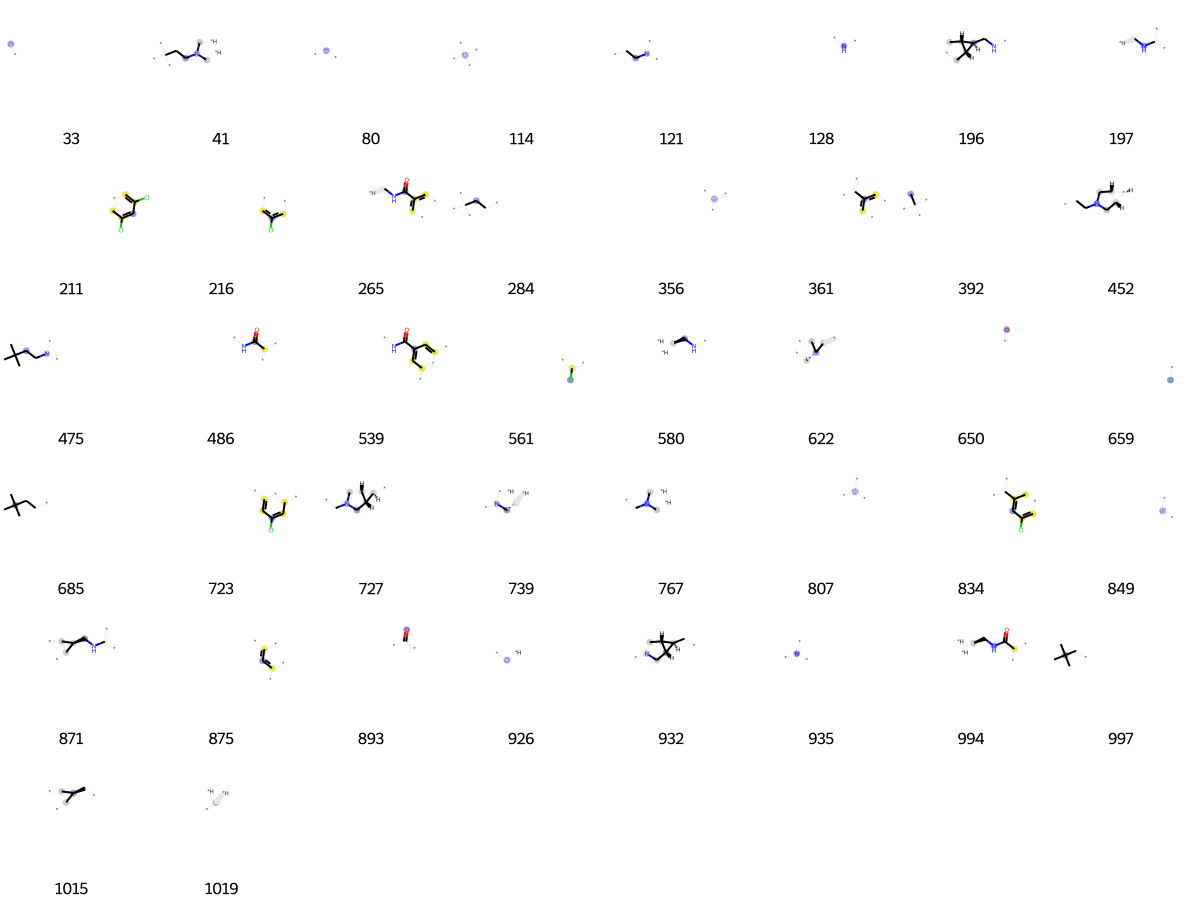

In [1070]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1071]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[1,
 33,
 45,
 64,
 79,
 80,
 121,
 147,
 175,
 197,
 261,
 325,
 333,
 356,
 385,
 389,
 403,
 409,
 464,
 500,
 502,
 511,
 549,
 650,
 661,
 726,
 777,
 786,
 807,
 820,
 825,
 849,
 893,
 935]

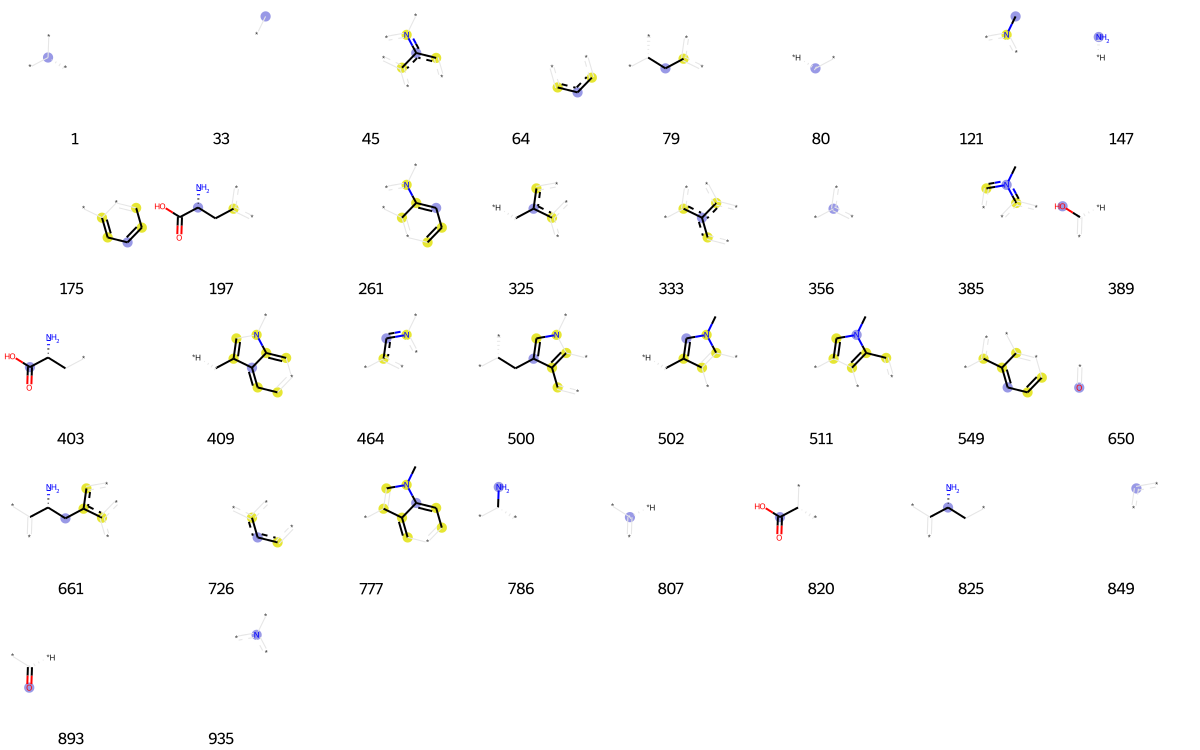

In [1072]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1073]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[25,
 28,
 33,
 46,
 64,
 65,
 80,
 139,
 157,
 175,
 212,
 216,
 222,
 239,
 260,
 305,
 319,
 322,
 325,
 332,
 338,
 350,
 356,
 366,
 452,
 473,
 507,
 512,
 533,
 540,
 552,
 561,
 573,
 650,
 659,
 660,
 694,
 695,
 715,
 718,
 726,
 744,
 781,
 807,
 815,
 816,
 831,
 835,
 841,
 849,
 866,
 878,
 881,
 922,
 927,
 994,
 1009]

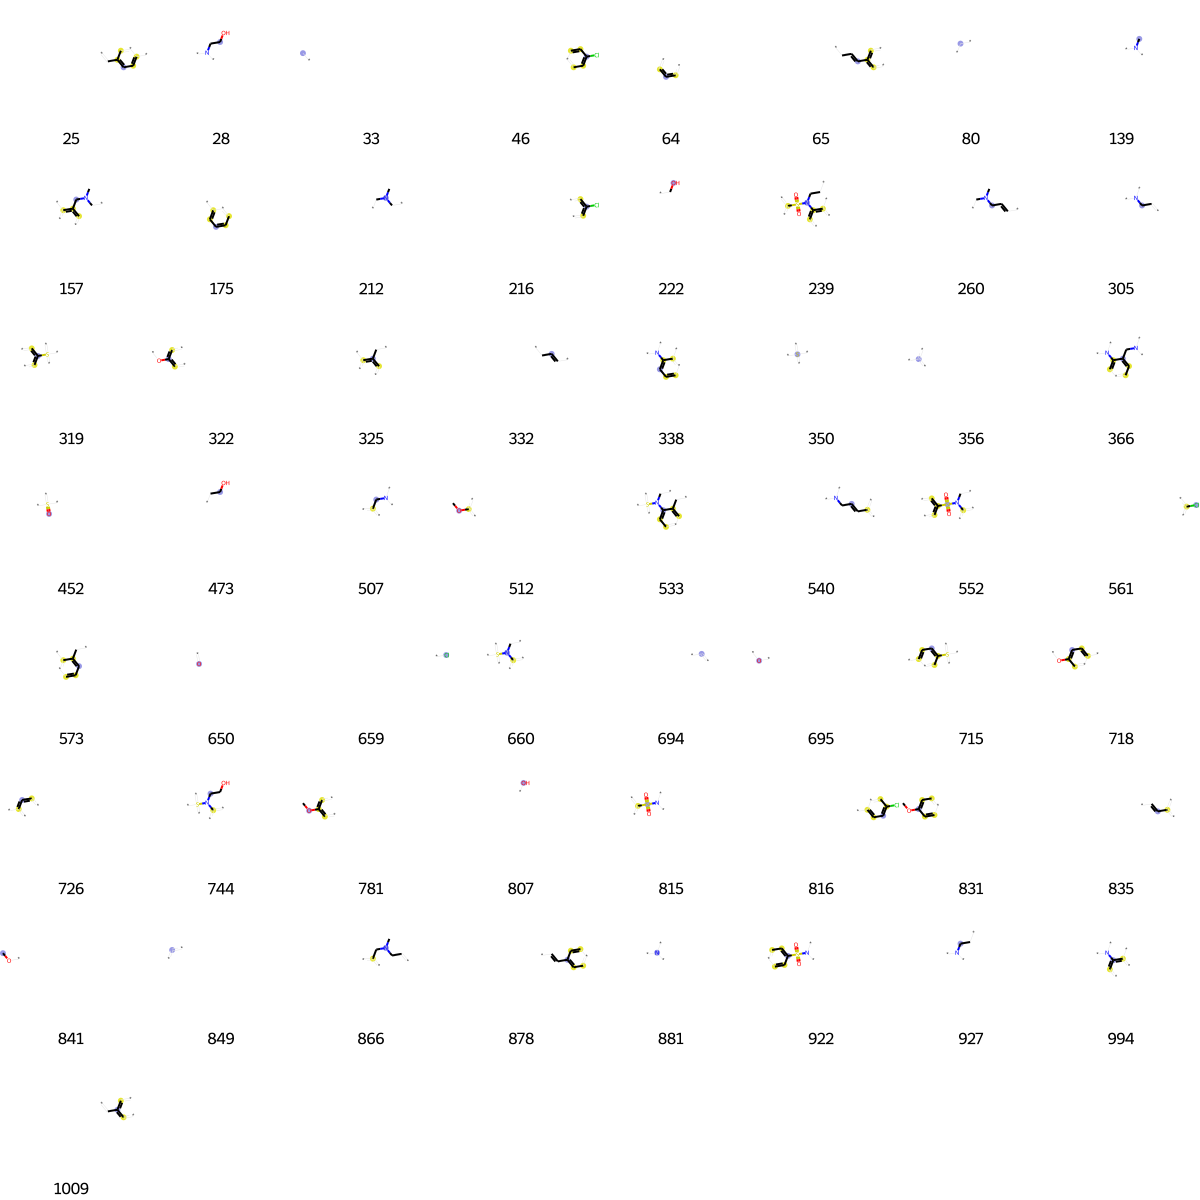

In [1074]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1075]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[33,
 51,
 80,
 121,
 140,
 147,
 171,
 172,
 231,
 247,
 286,
 318,
 356,
 378,
 428,
 448,
 487,
 511,
 564,
 650,
 653,
 695,
 715,
 745,
 753,
 778,
 796,
 807,
 838,
 849,
 893,
 935,
 939,
 949]

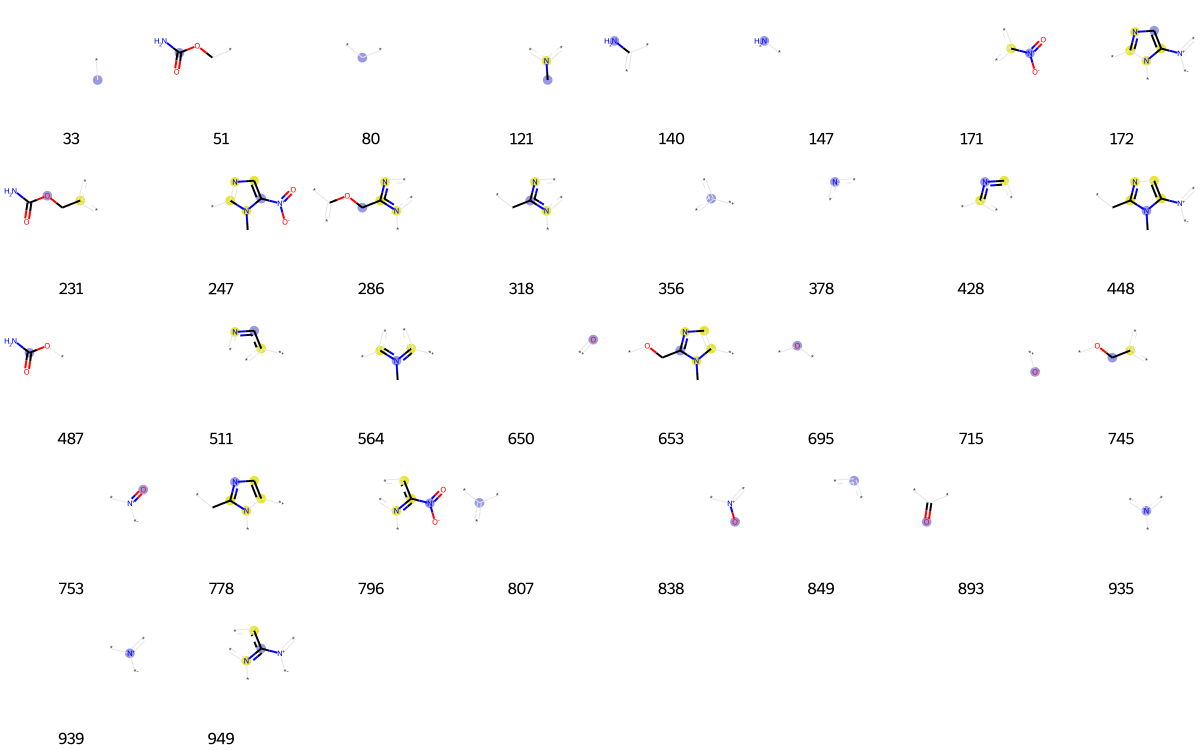

In [1076]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1077]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[29,
 53,
 58,
 74,
 80,
 90,
 136,
 166,
 168,
 171,
 185,
 204,
 209,
 211,
 233,
 235,
 301,
 314,
 318,
 340,
 356,
 378,
 454,
 456,
 458,
 511,
 561,
 600,
 645,
 650,
 652,
 656,
 687,
 726,
 736,
 739,
 758,
 784,
 785,
 786,
 787,
 800,
 801,
 807,
 831,
 849,
 875,
 877,
 893,
 896,
 898,
 926,
 935,
 940,
 969,
 974,
 980,
 983,
 985,
 1019]

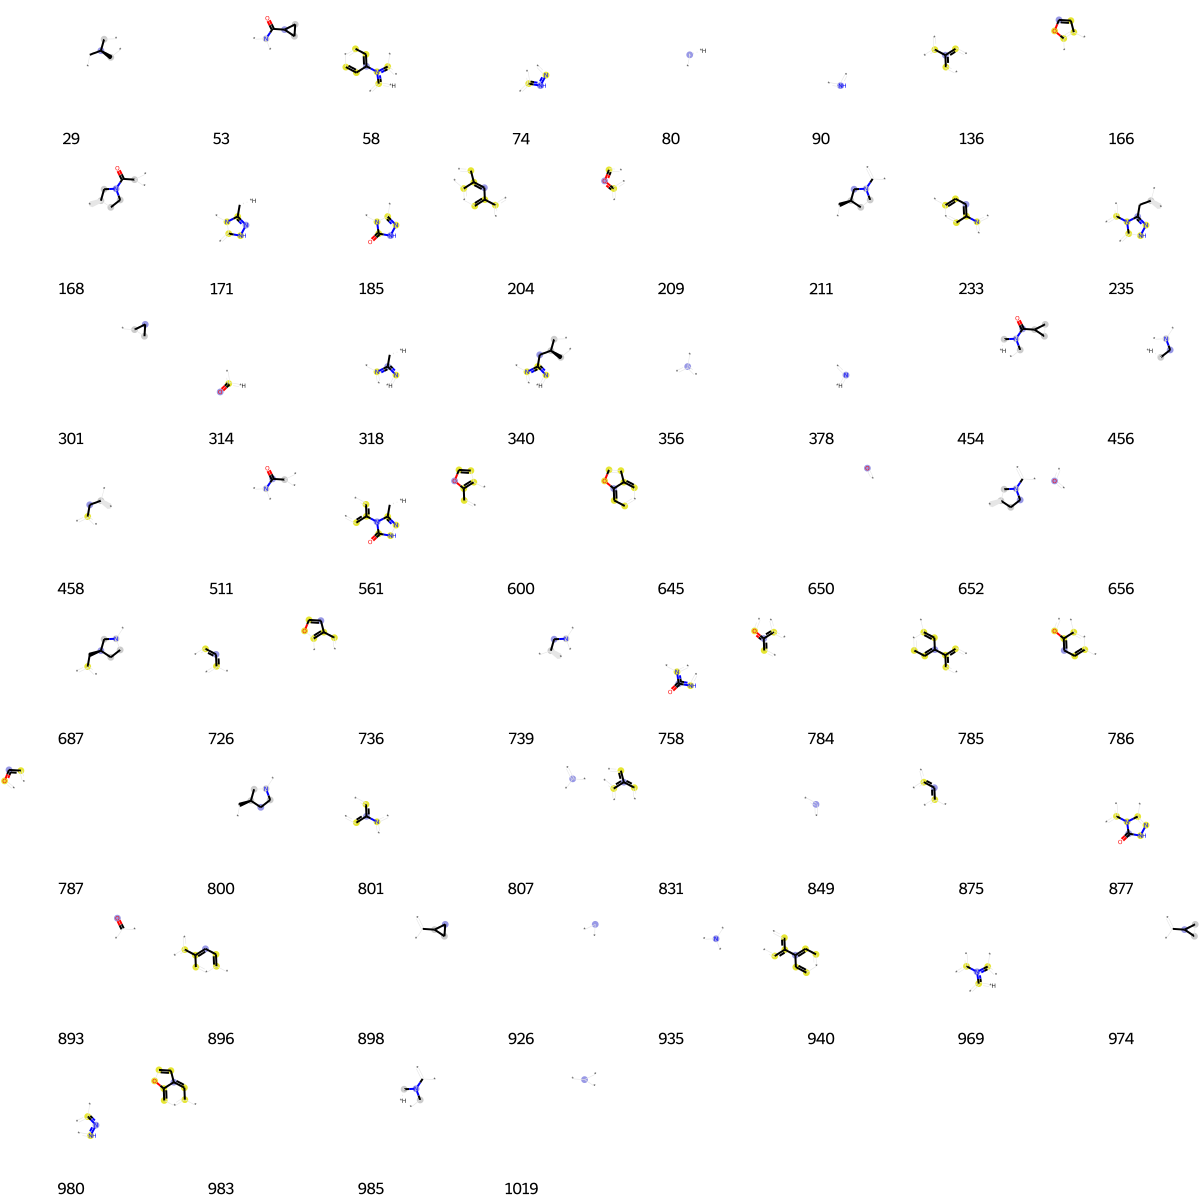

In [1078]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1079]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 15,
 26,
 42,
 55,
 64,
 80,
 90,
 99,
 114,
 119,
 128,
 145,
 219,
 255,
 322,
 325,
 333,
 349,
 356,
 364,
 386,
 428,
 429,
 463,
 476,
 477,
 483,
 487,
 559,
 562,
 567,
 583,
 623,
 646,
 667,
 695,
 699,
 709,
 720,
 726,
 730,
 755,
 801,
 806,
 849,
 855,
 875,
 904,
 913,
 966,
 972,
 984,
 1004]

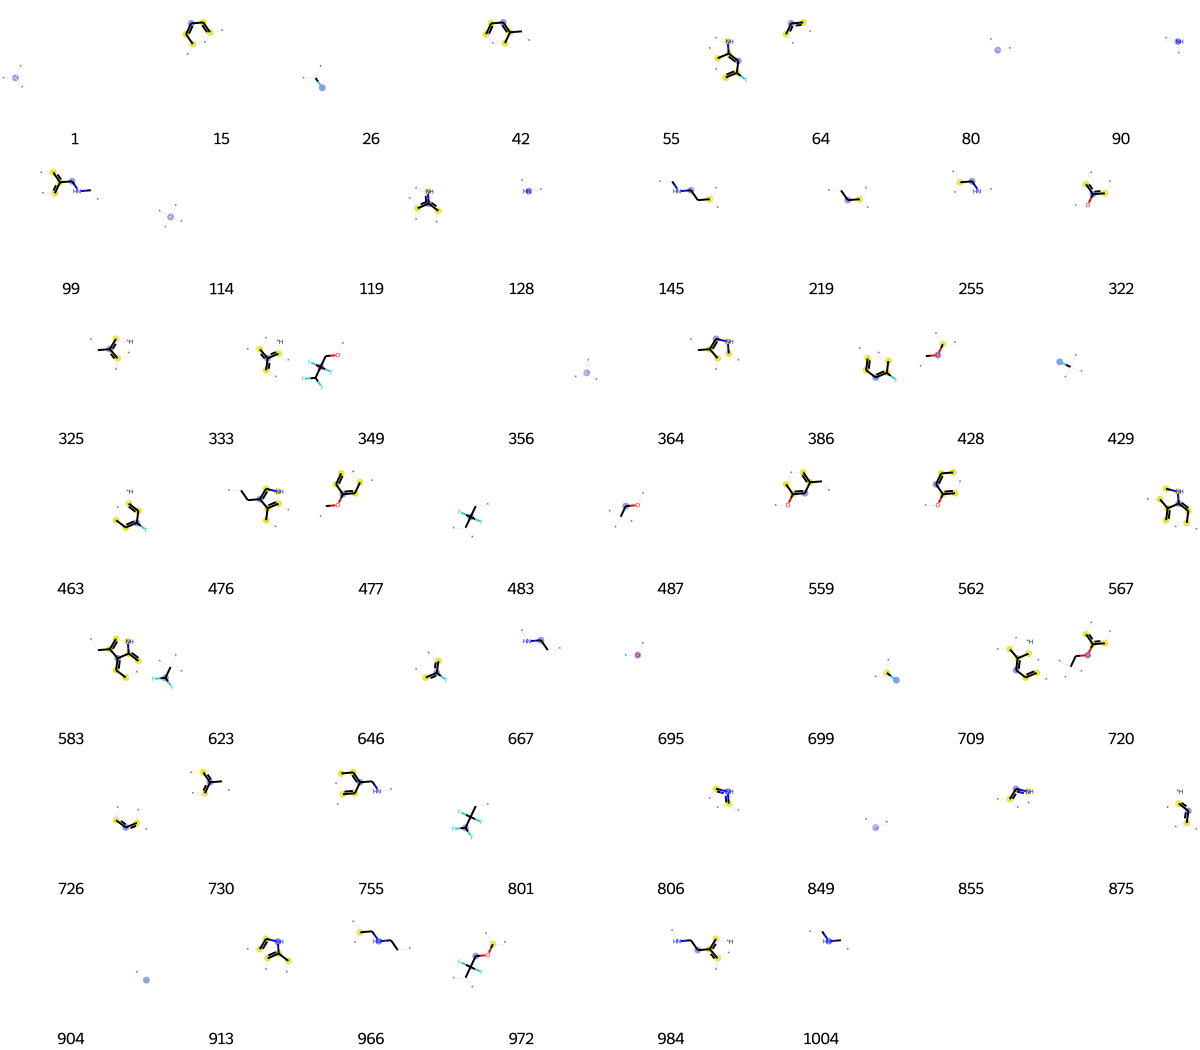

In [1080]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1081]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[8,
 33,
 64,
 65,
 73,
 136,
 175,
 189,
 193,
 202,
 222,
 252,
 323,
 333,
 352,
 356,
 378,
 386,
 389,
 414,
 451,
 463,
 471,
 544,
 586,
 592,
 646,
 650,
 698,
 699,
 706,
 715,
 726,
 807,
 816,
 831,
 849,
 875,
 893,
 896,
 904,
 961,
 982,
 984,
 988,
 1018]

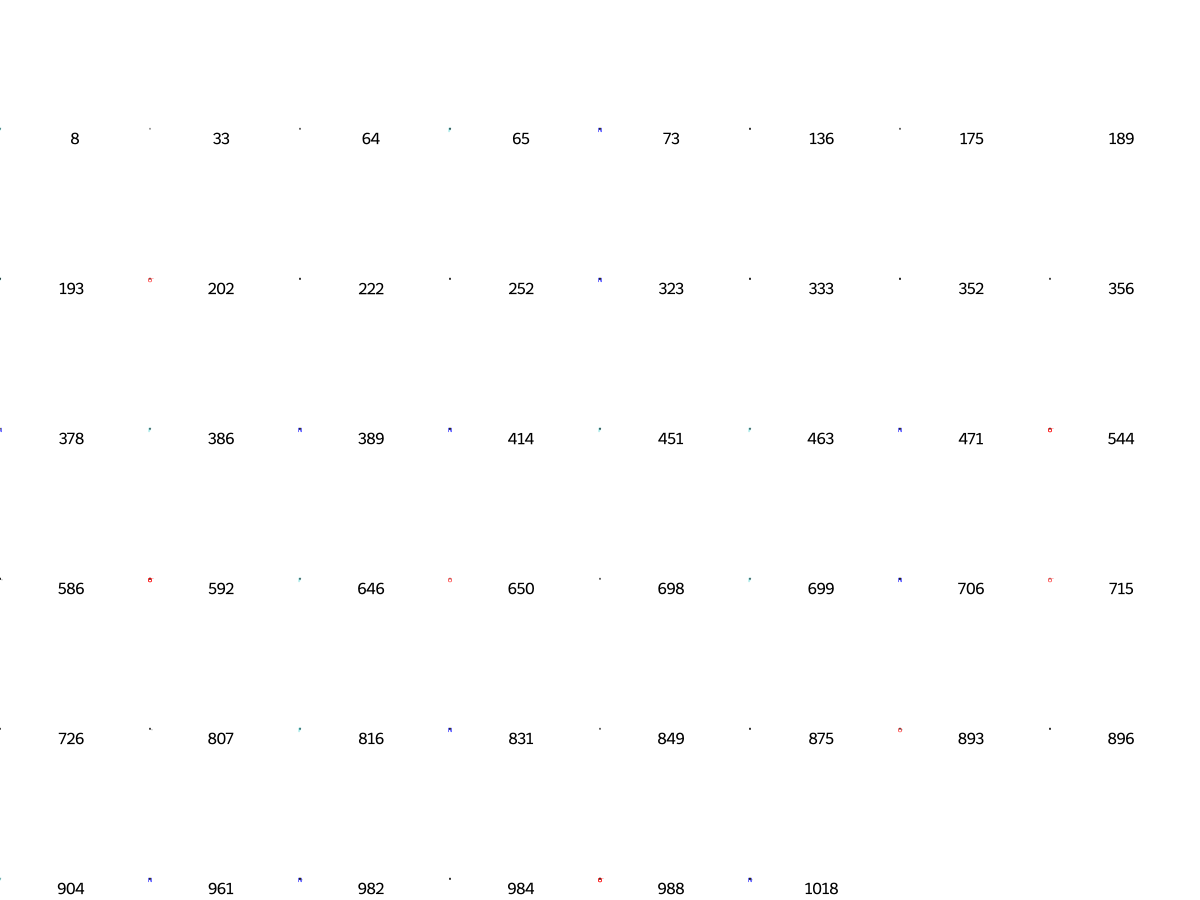

In [1082]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1083]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[15,
 33,
 42,
 64,
 80,
 114,
 121,
 136,
 146,
 147,
 174,
 209,
 212,
 236,
 271,
 284,
 296,
 309,
 323,
 325,
 344,
 352,
 356,
 360,
 363,
 377,
 378,
 385,
 393,
 413,
 428,
 429,
 433,
 435,
 453,
 456,
 464,
 489,
 498,
 548,
 626,
 650,
 672,
 714,
 726,
 730,
 752,
 786,
 798,
 807,
 809,
 849,
 864,
 875,
 889,
 891,
 893,
 896,
 904,
 926,
 935,
 960,
 993,
 1009]

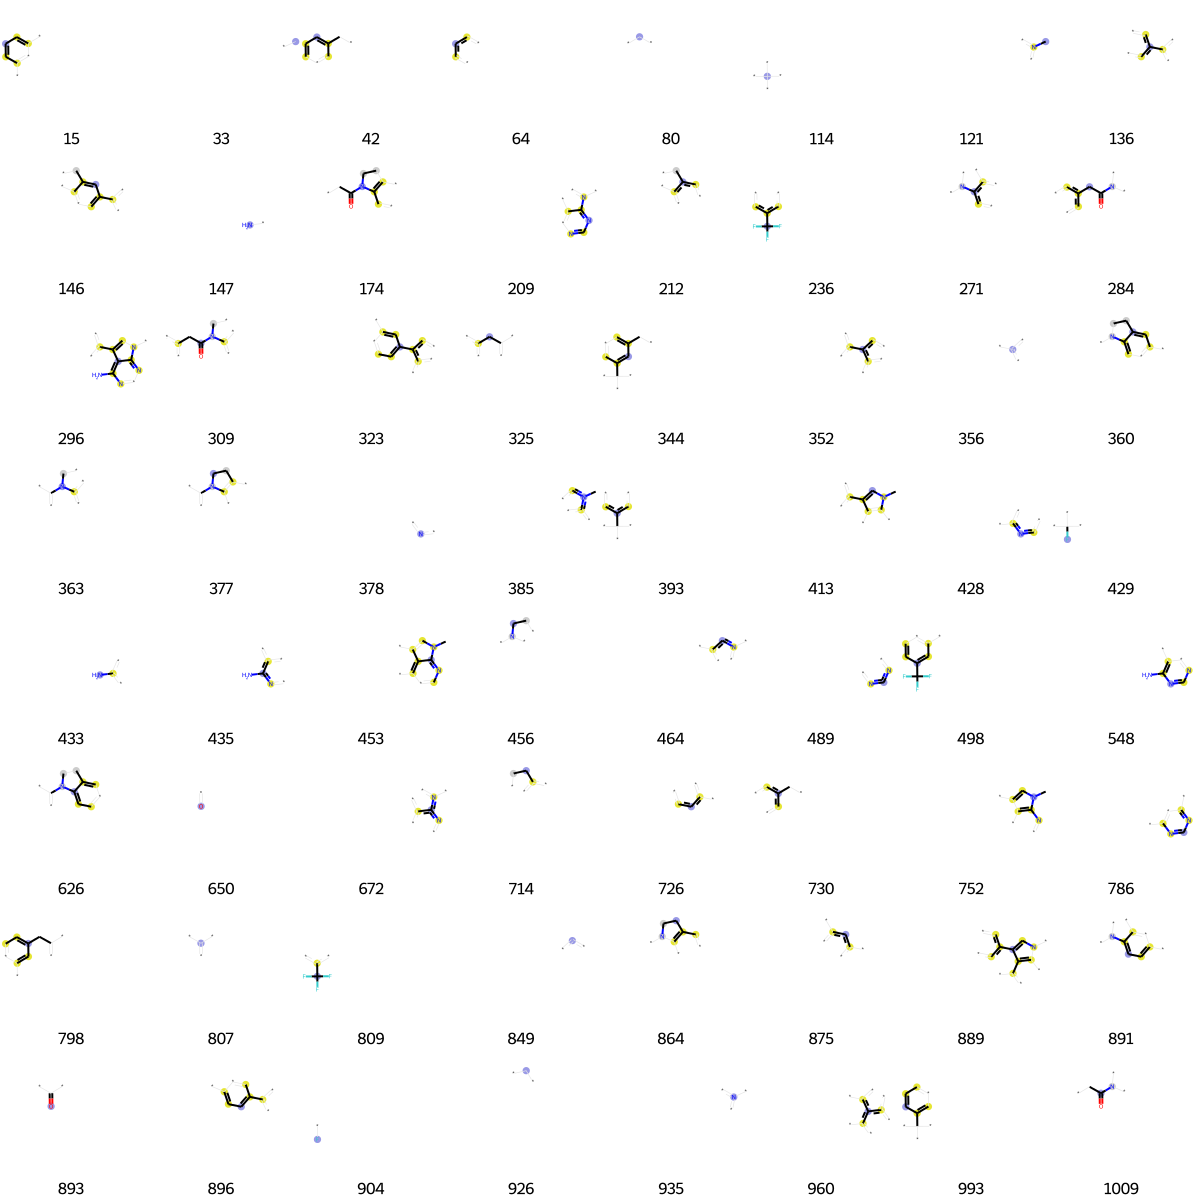

In [1084]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1085]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[1,
 3,
 5,
 33,
 64,
 117,
 121,
 128,
 144,
 175,
 177,
 212,
 225,
 227,
 241,
 283,
 314,
 356,
 371,
 387,
 405,
 421,
 456,
 573,
 650,
 667,
 669,
 684,
 706,
 714,
 726,
 749,
 765,
 805,
 807,
 847,
 849,
 864,
 886,
 893,
 914,
 921,
 926,
 935,
 989,
 1019]

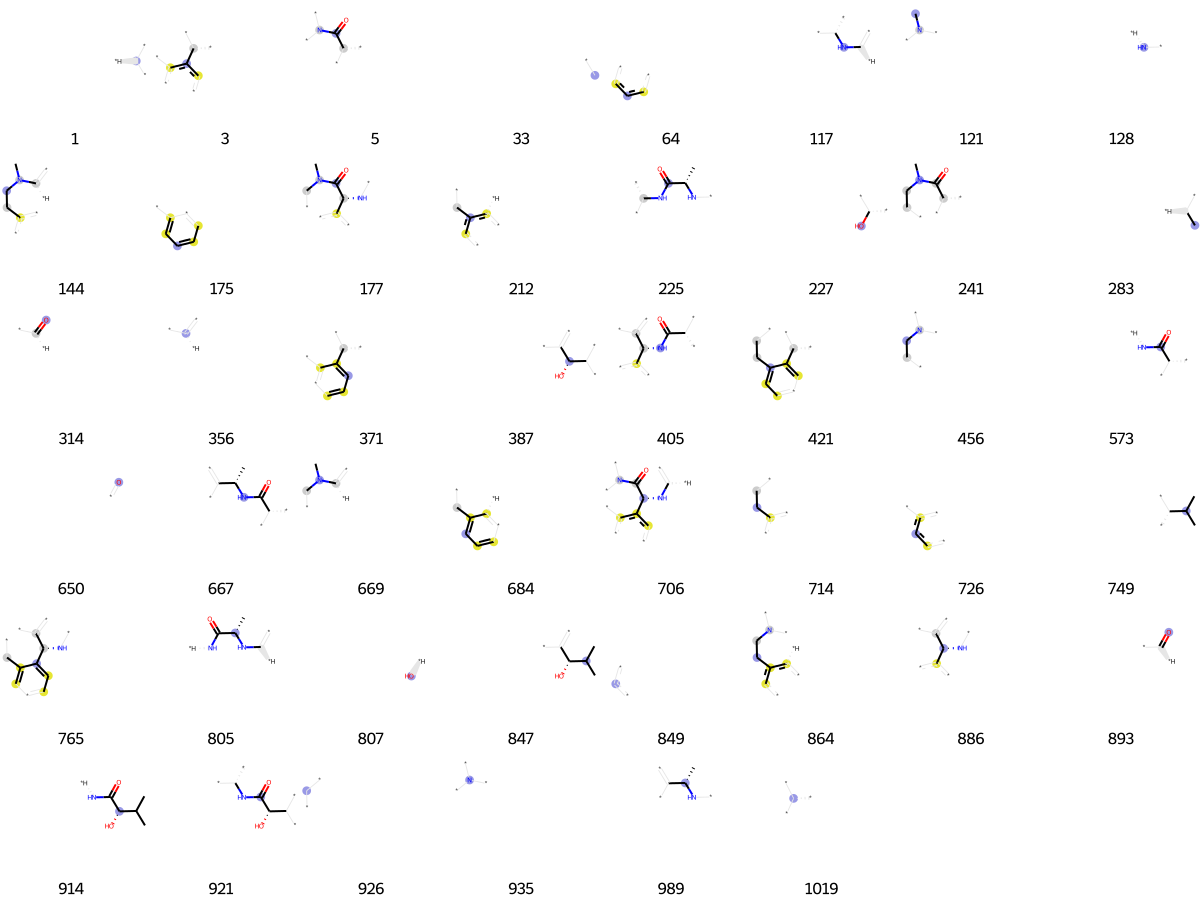

In [1086]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1087]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 7,
 8,
 16,
 33,
 36,
 80,
 105,
 116,
 138,
 156,
 216,
 231,
 233,
 243,
 250,
 283,
 294,
 301,
 302,
 356,
 370,
 377,
 439,
 453,
 470,
 504,
 519,
 520,
 529,
 531,
 562,
 590,
 598,
 600,
 622,
 632,
 687,
 694,
 696,
 749,
 757,
 775,
 807,
 849,
 850,
 860,
 897,
 926,
 927,
 978,
 1019]

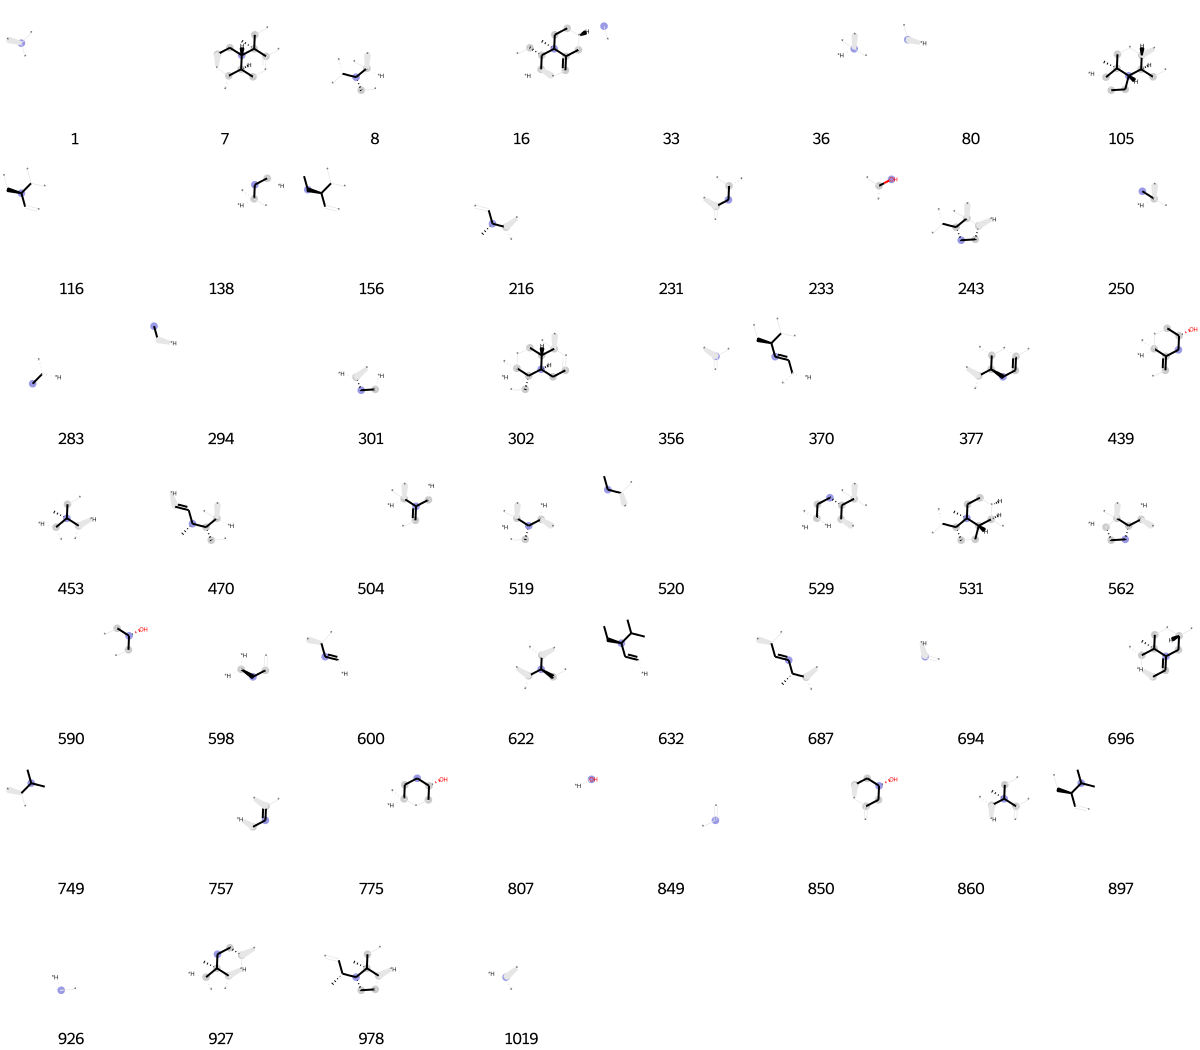

In [1088]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1089]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[21,
 42,
 64,
 80,
 128,
 147,
 175,
 219,
 350,
 356,
 389,
 452,
 483,
 555,
 592,
 594,
 650,
 667,
 677,
 726,
 730,
 807,
 849,
 882,
 953]

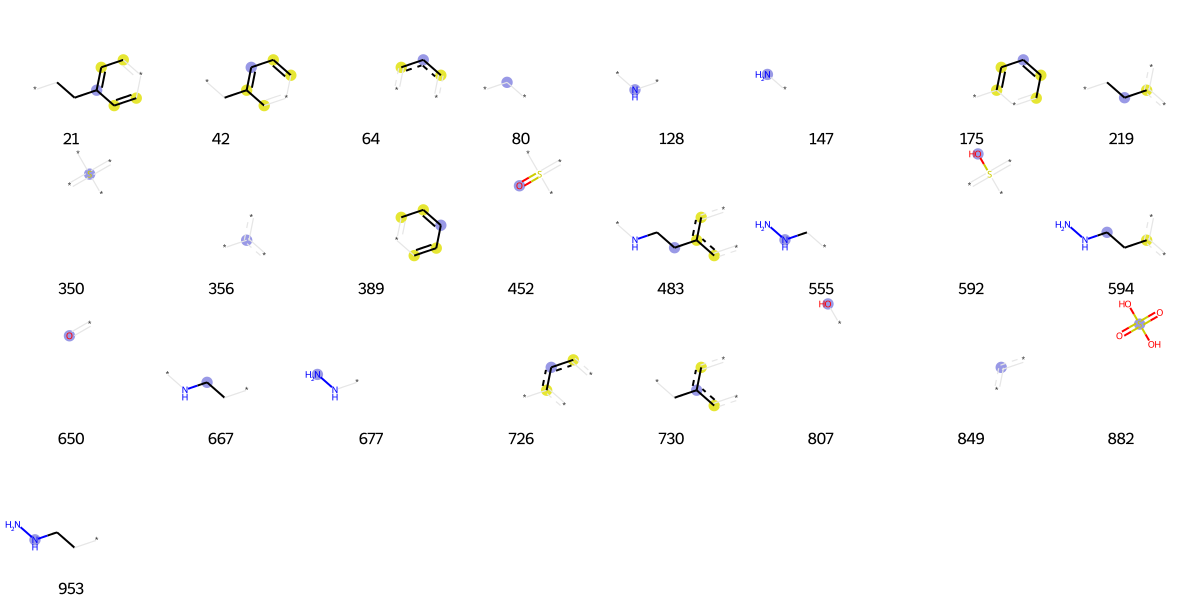

In [1090]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1091]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[29,
 33,
 80,
 83,
 90,
 128,
 146,
 204,
 214,
 237,
 276,
 277,
 288,
 301,
 314,
 320,
 322,
 354,
 356,
 360,
 361,
 378,
 437,
 452,
 456,
 507,
 512,
 517,
 523,
 609,
 619,
 647,
 650,
 656,
 673,
 695,
 714,
 718,
 721,
 726,
 739,
 746,
 750,
 752,
 755,
 756,
 767,
 781,
 807,
 813,
 831,
 834,
 841,
 849,
 881,
 890,
 893,
 924,
 926,
 929,
 935,
 950,
 974,
 978,
 1019]

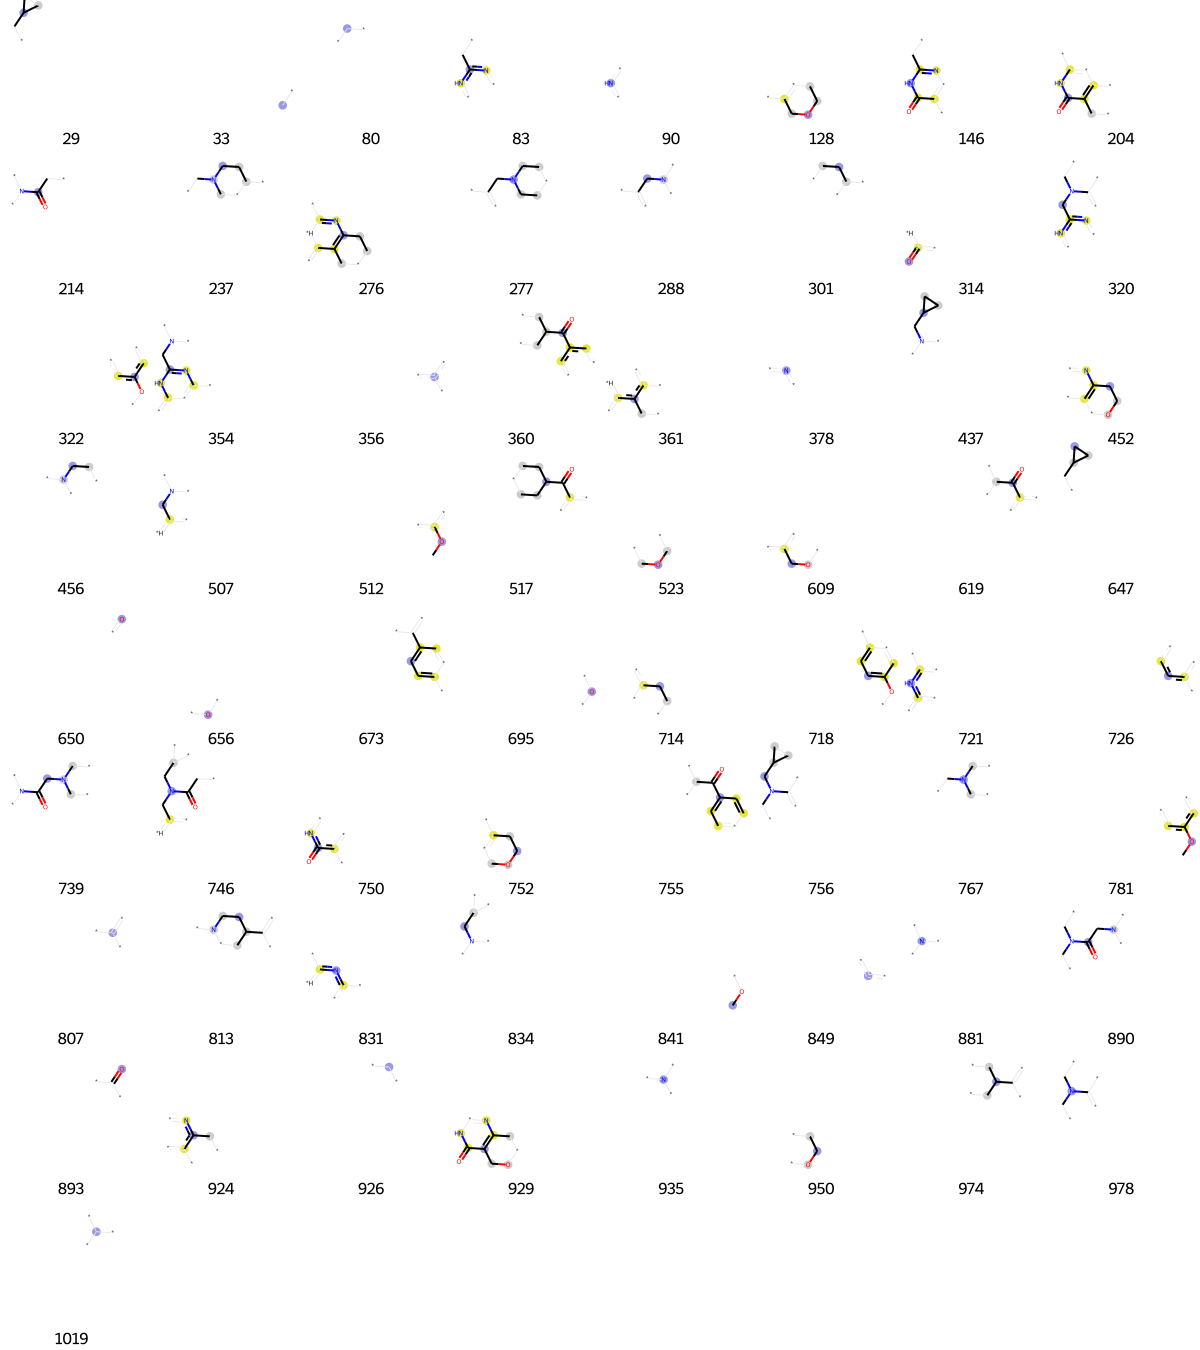

In [1092]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1093]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 37,
 80,
 114,
 119,
 143,
 284,
 323,
 389,
 392,
 587,
 650,
 713,
 795,
 807,
 852,
 860,
 887,
 893]

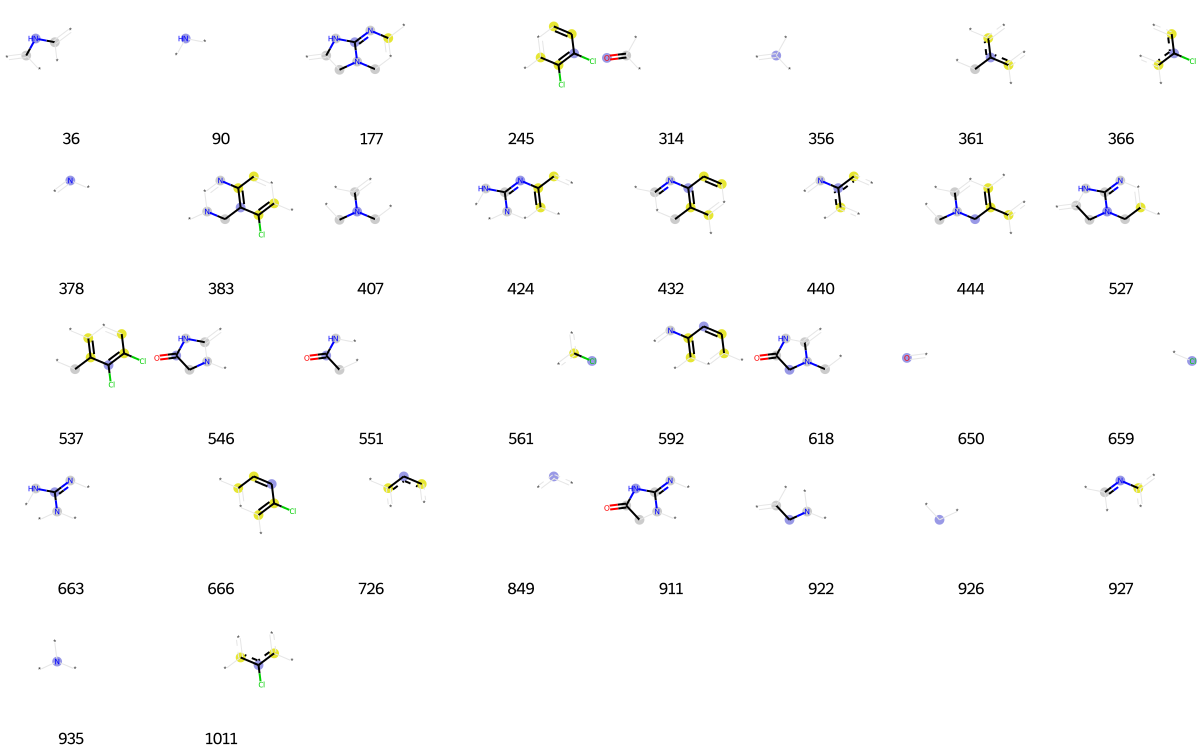

In [1094]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1095]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 3,
 5,
 33,
 64,
 117,
 121,
 128,
 144,
 175,
 177,
 212,
 225,
 227,
 241,
 283,
 314,
 356,
 371,
 387,
 405,
 421,
 456,
 573,
 650,
 667,
 669,
 684,
 706,
 714,
 726,
 749,
 765,
 805,
 807,
 847,
 849,
 864,
 886,
 893,
 914,
 921,
 926,
 935,
 989,
 1019]

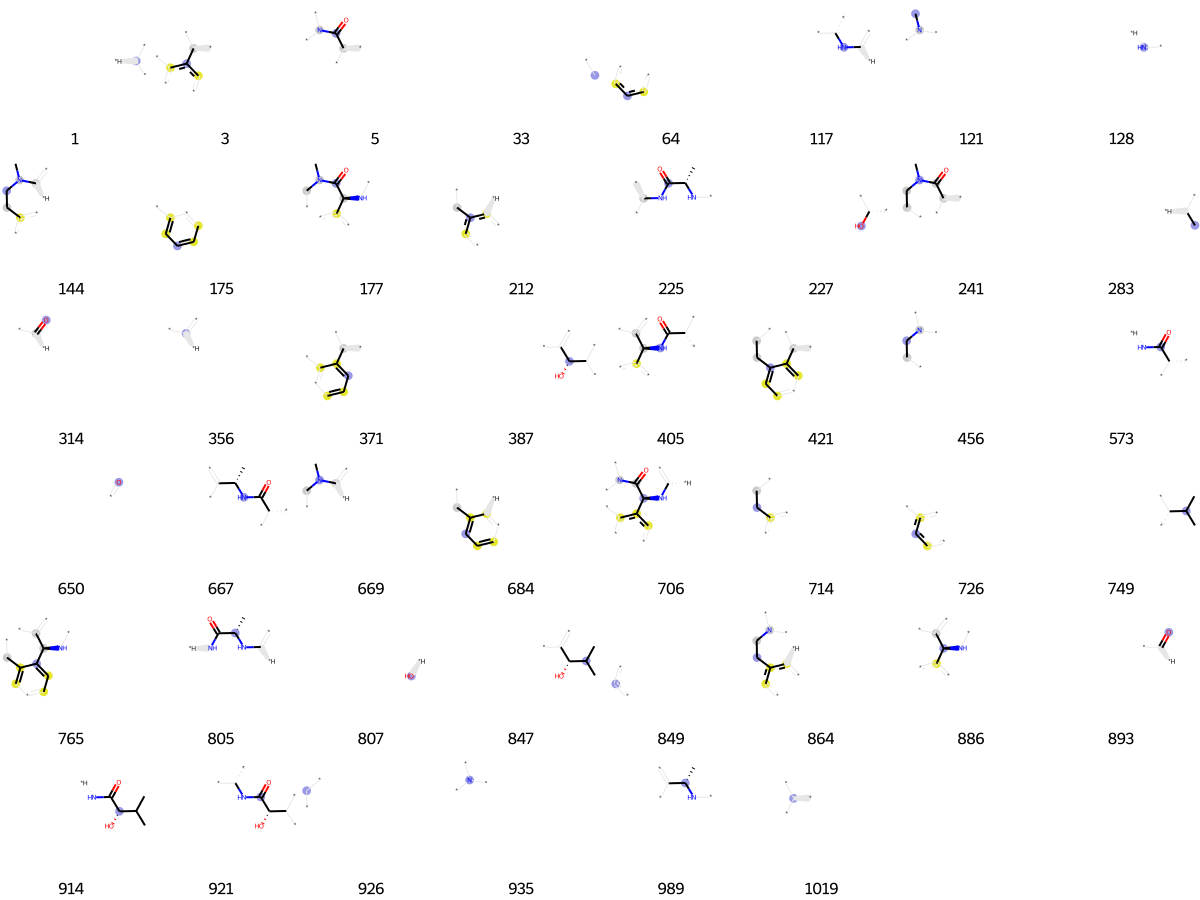

In [1096]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [1097]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[10,
 47,
 62,
 73,
 89,
 90,
 128,
 200,
 256,
 272,
 305,
 313,
 356,
 378,
 425,
 428,
 434,
 491,
 577,
 607,
 613,
 623,
 700,
 726,
 728,
 738,
 800,
 832,
 836,
 842,
 849,
 881,
 915,
 926,
 961]

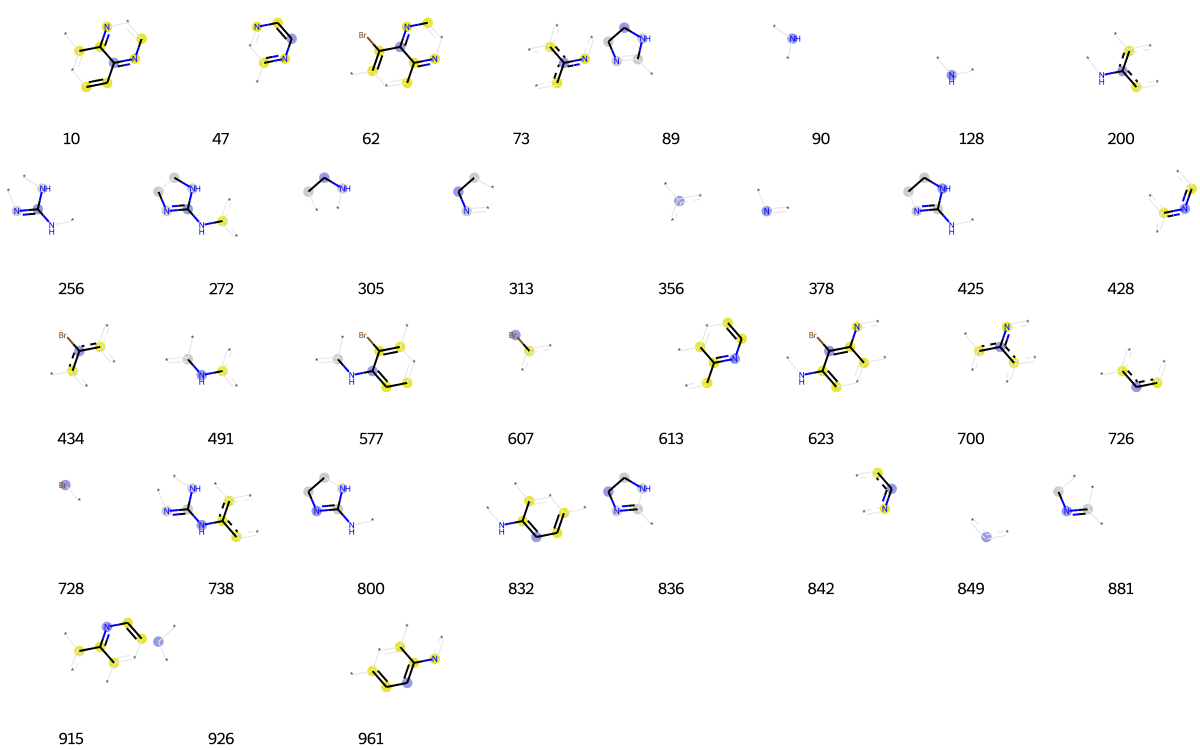

In [1098]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1099]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[1,
 33,
 76,
 80,
 95,
 128,
 140,
 147,
 153,
 182,
 209,
 253,
 259,
 283,
 294,
 339,
 356,
 378,
 390,
 427,
 433,
 435,
 452,
 459,
 486,
 490,
 535,
 561,
 623,
 634,
 650,
 659,
 749,
 759,
 807,
 831,
 858,
 881,
 893,
 932,
 996]

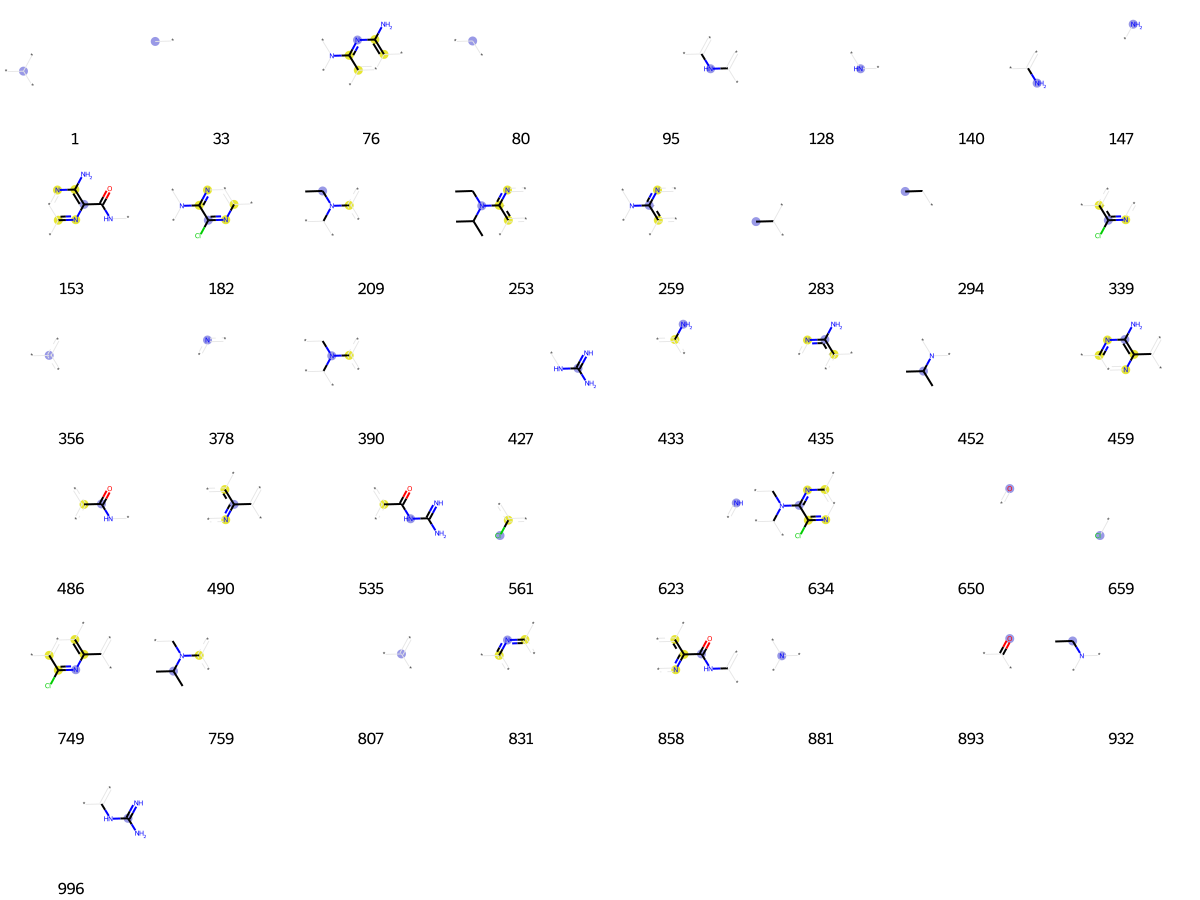

In [1100]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1101]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[3,
 36,
 64,
 90,
 105,
 133,
 142,
 175,
 187,
 295,
 314,
 328,
 343,
 352,
 356,
 380,
 442,
 446,
 464,
 527,
 542,
 570,
 574,
 580,
 607,
 633,
 650,
 680,
 725,
 726,
 728,
 766,
 807,
 849,
 875,
 878,
 895,
 909,
 958,
 984]

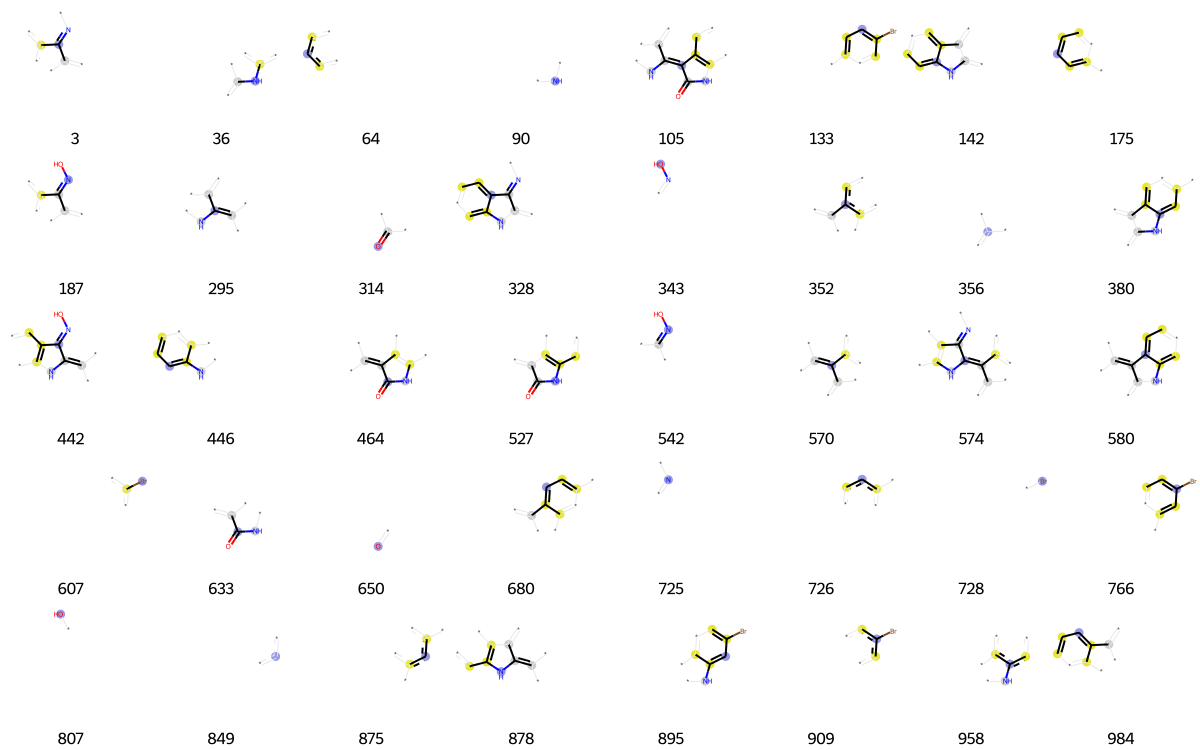

In [1102]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1103]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[2,
 4,
 5,
 33,
 36,
 51,
 73,
 78,
 90,
 114,
 125,
 128,
 162,
 189,
 200,
 215,
 232,
 246,
 264,
 268,
 276,
 280,
 301,
 307,
 308,
 310,
 312,
 314,
 320,
 322,
 328,
 342,
 344,
 350,
 356,
 357,
 378,
 381,
 392,
 402,
 409,
 416,
 429,
 452,
 463,
 490,
 500,
 512,
 524,
 531,
 573,
 585,
 594,
 621,
 627,
 641,
 650,
 656,
 679,
 684,
 689,
 694,
 695,
 711,
 712,
 714,
 718,
 726,
 727,
 739,
 750,
 781,
 795,
 807,
 816,
 819,
 826,
 831,
 841,
 849,
 855,
 875,
 890,
 893,
 919,
 924,
 926,
 935,
 937,
 940,
 948,
 949,
 955,
 961,
 988,
 1019]

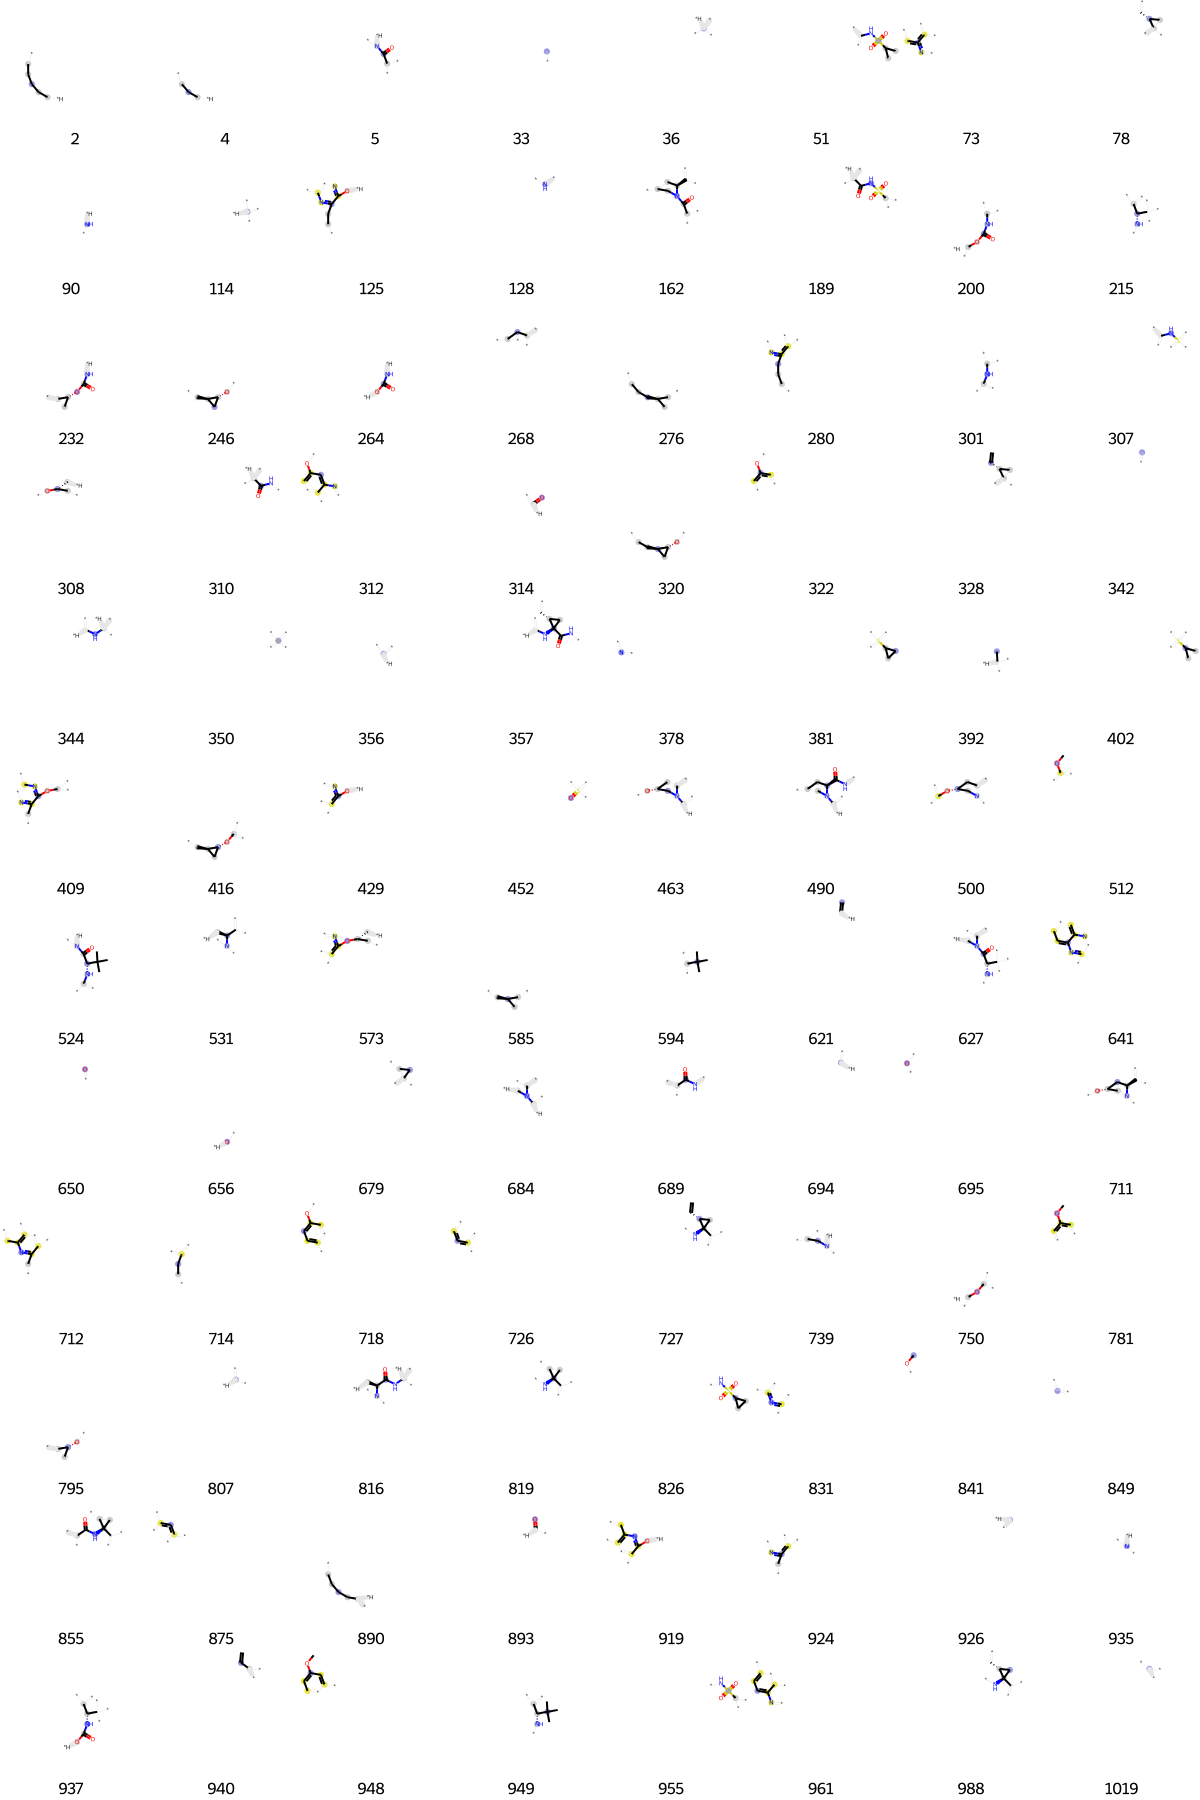

In [1104]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1105]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[1,
 15,
 64,
 80,
 86,
 118,
 165,
 204,
 216,
 226,
 227,
 233,
 237,
 256,
 263,
 265,
 268,
 322,
 332,
 356,
 389,
 401,
 407,
 421,
 428,
 477,
 540,
 561,
 562,
 575,
 592,
 600,
 628,
 637,
 650,
 656,
 659,
 668,
 694,
 695,
 713,
 721,
 726,
 731,
 775,
 787,
 807,
 849,
 875,
 887,
 893,
 895,
 922,
 926,
 1015,
 1019]

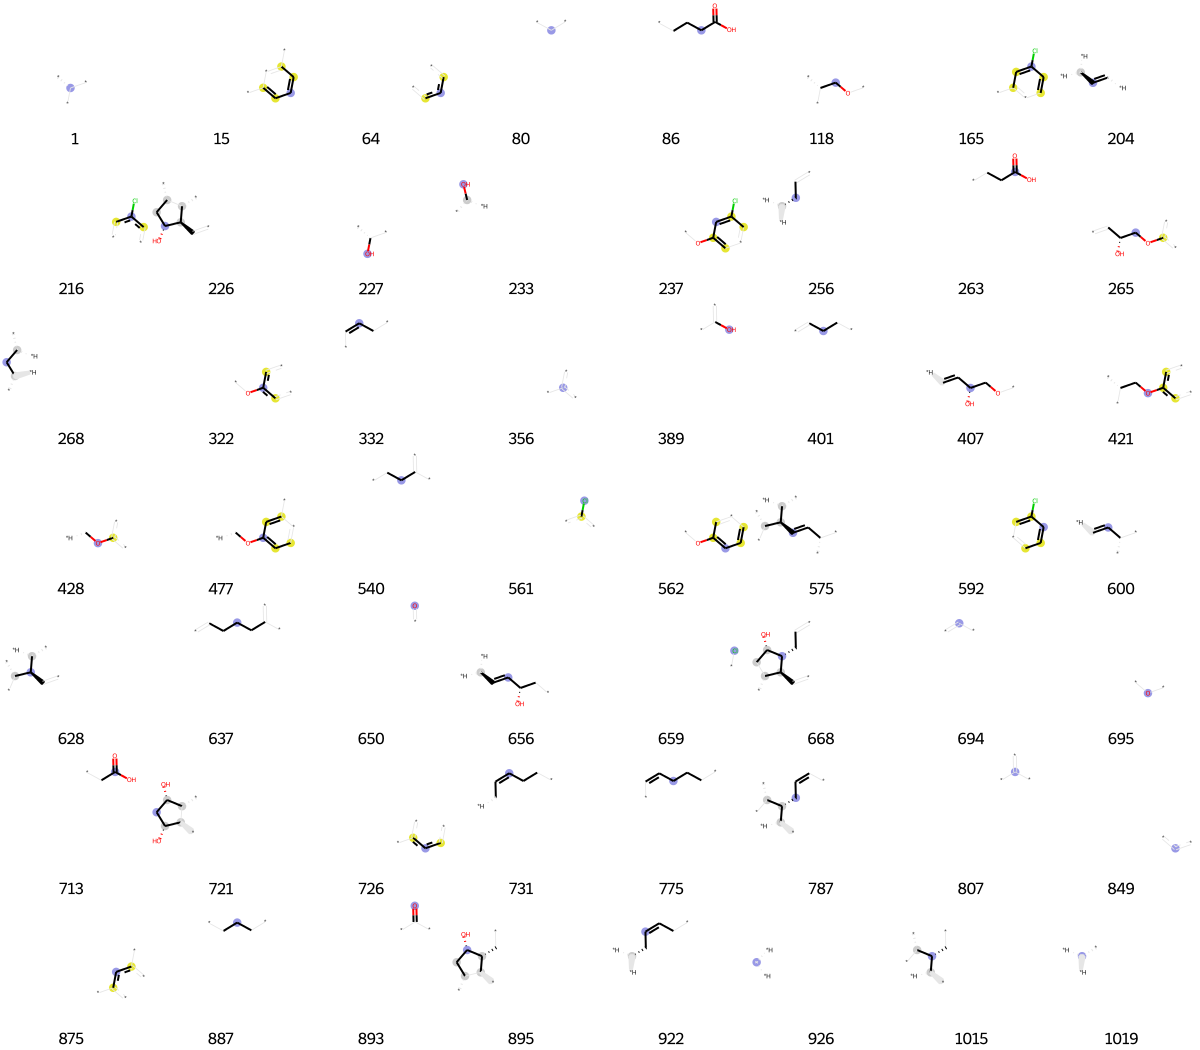

In [1106]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1107]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[11,
 15,
 33,
 36,
 64,
 80,
 102,
 112,
 193,
 209,
 239,
 250,
 270,
 274,
 296,
 301,
 304,
 314,
 352,
 356,
 384,
 414,
 432,
 452,
 521,
 531,
 558,
 569,
 601,
 604,
 611,
 631,
 650,
 656,
 679,
 695,
 697,
 699,
 714,
 747,
 750,
 758,
 807,
 811,
 831,
 841,
 842,
 849,
 860,
 893,
 926,
 931,
 1004,
 1005,
 1010,
 1011,
 1017,
 1019]

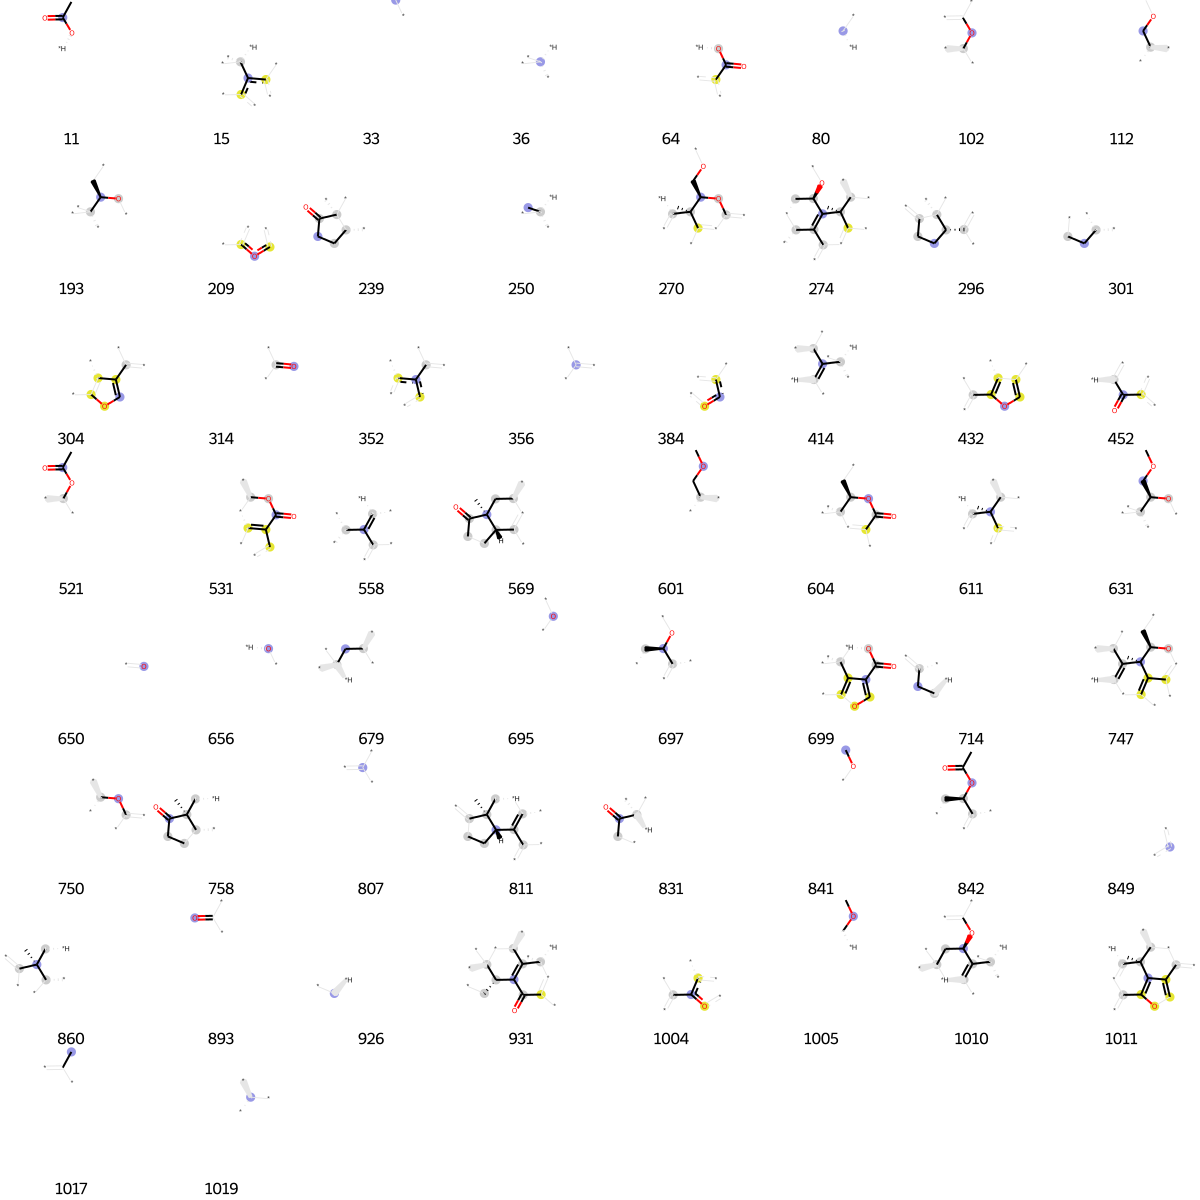

In [1108]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [1109]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 24,
 32,
 33,
 48,
 66,
 74,
 90,
 112,
 115,
 121,
 237,
 266,
 279,
 283,
 314,
 333,
 356,
 360,
 366,
 378,
 434,
 436,
 445,
 537,
 546,
 561,
 593,
 598,
 650,
 659,
 674,
 695,
 721,
 732,
 750,
 757,
 758,
 790,
 801,
 828,
 849,
 875,
 897,
 899,
 903,
 911,
 932,
 935,
 965,
 980,
 1021]

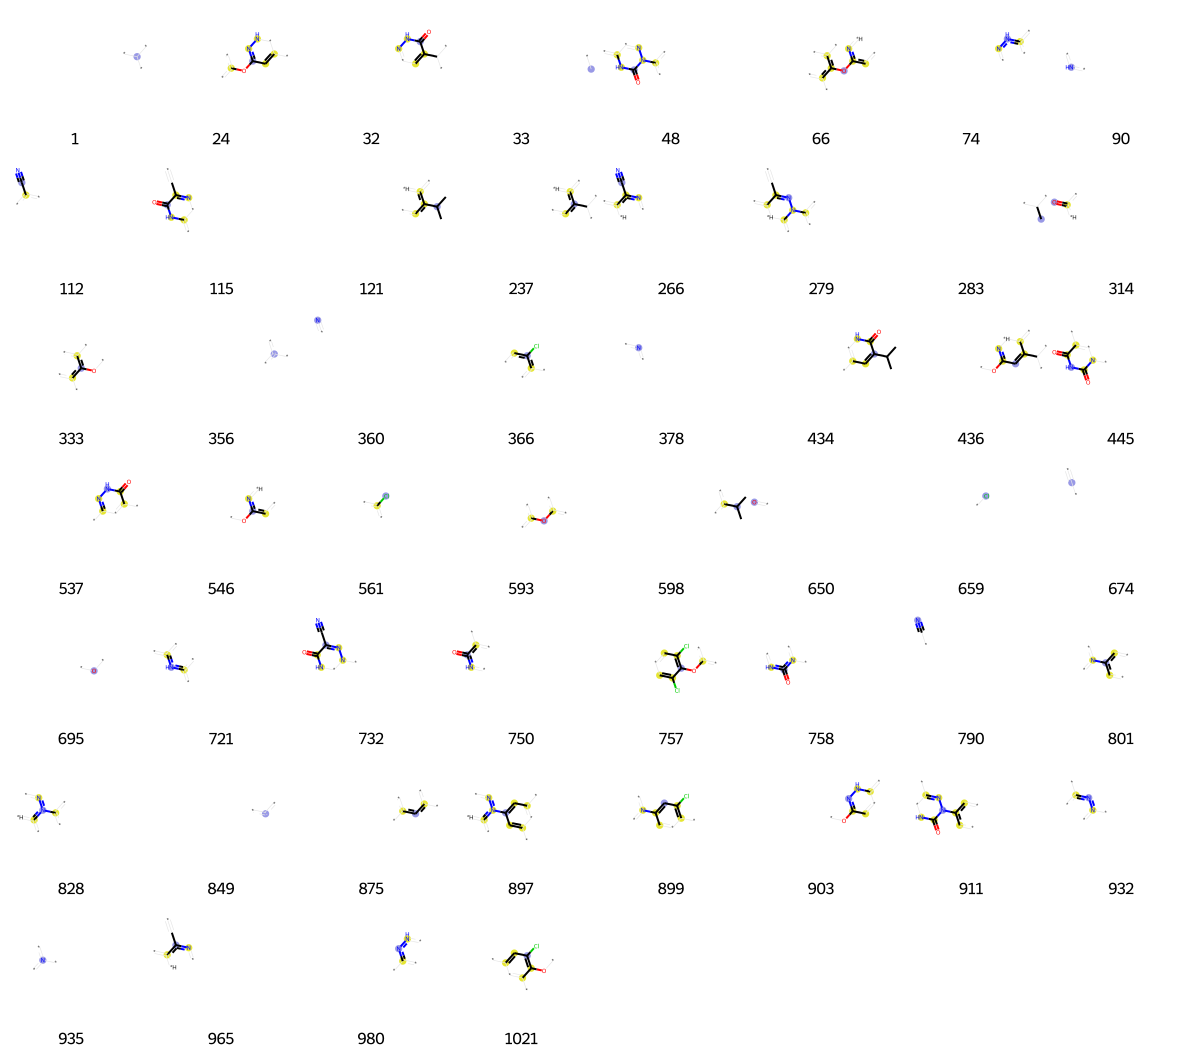

In [1110]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1111]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[19,
 40,
 41,
 64,
 80,
 128,
 175,
 191,
 332,
 356,
 361,
 378,
 389,
 437,
 511,
 562,
 579,
 594,
 610,
 650,
 669,
 703,
 707,
 726,
 792,
 807,
 842,
 849,
 860,
 893,
 901,
 961]

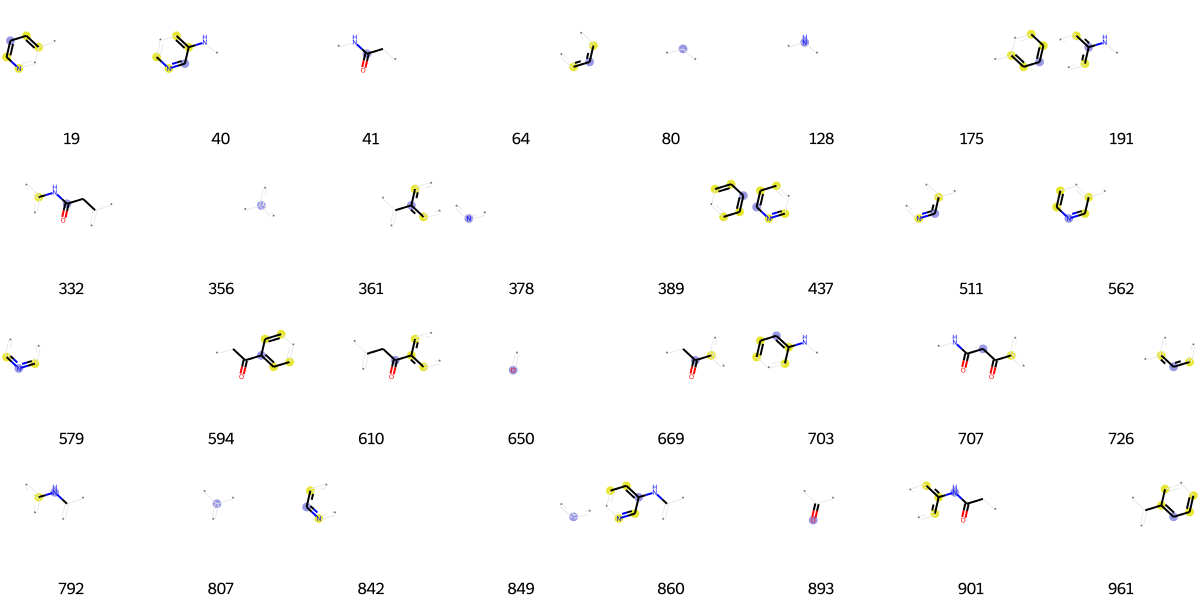

In [1112]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1113]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[15,
 62,
 64,
 80,
 136,
 147,
 162,
 175,
 235,
 272,
 315,
 356,
 389,
 504,
 656,
 675,
 724,
 726,
 736,
 795,
 849,
 970,
 981]

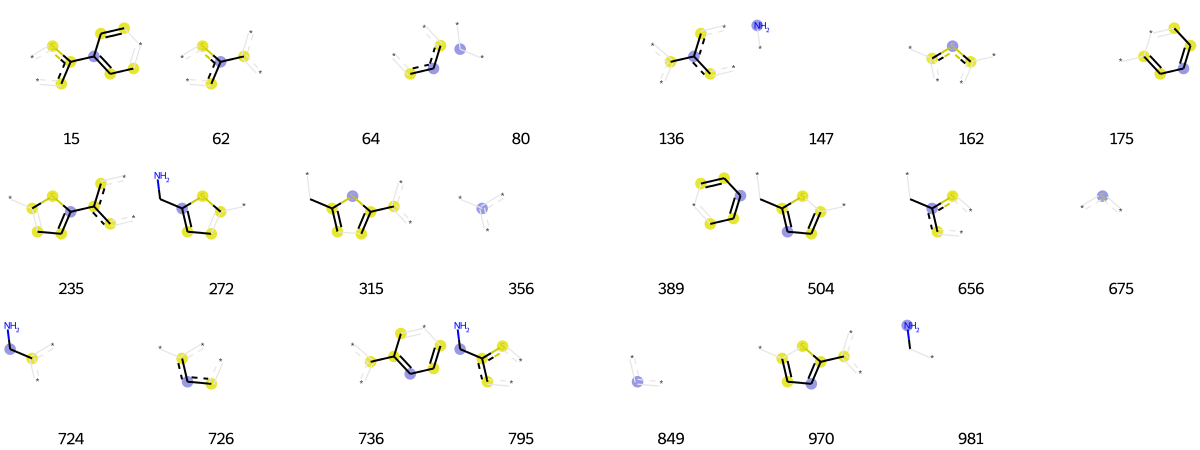

In [1114]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1115]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[33,
 49,
 80,
 89,
 90,
 114,
 305,
 313,
 315,
 356,
 367,
 378,
 380,
 392,
 393,
 406,
 507,
 556,
 696,
 698,
 757,
 834,
 836,
 842,
 849,
 872,
 875,
 881,
 926,
 1010]

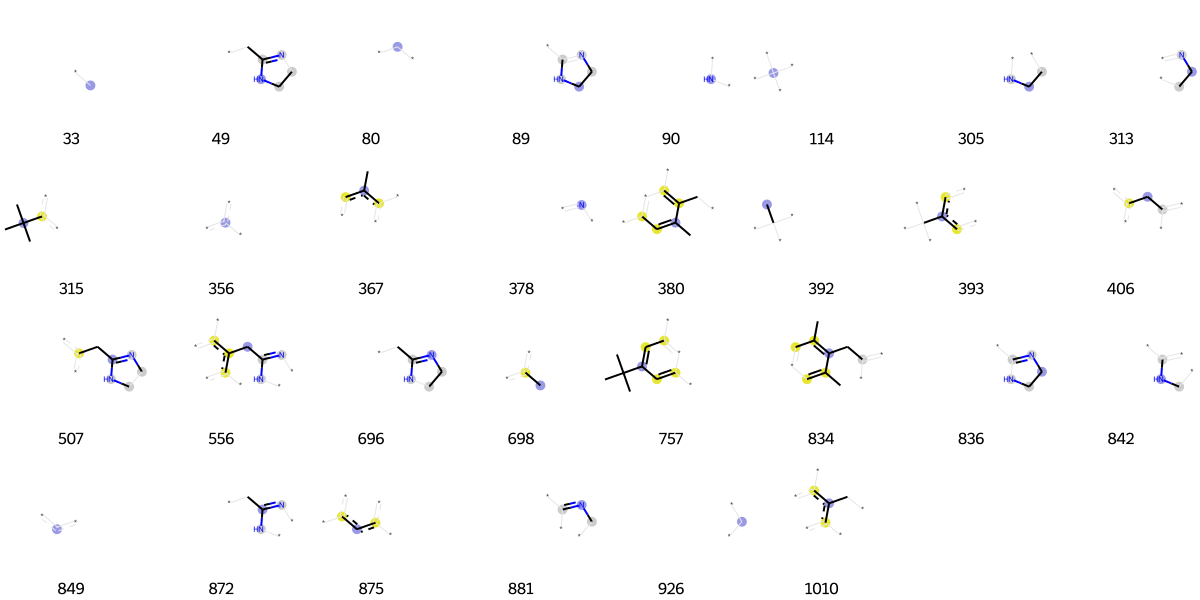

In [1116]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])